In [ ]:
import datetime
start_time = datetime.datetime.now()

### Importing libraries & Data

In [6]:
# Set the working directory
import os
os.chdir('C:/GitHub/CoAuthorViz_Dashboard')

In [7]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import plotly.graph_objects as go

# Defining the file paths for the "CoAuthor Metrics" datasets
file_path = "CoAuthorViz/csv/coauthorviz_metrics.csv"

# Loading the datasets from CSV files into Pandas dataframes
data = pd.read_csv(file_path)
data1 = pd.read_csv(file_path)

In [8]:
#Viewing the first five columns
data.head()

Unnamed: 0                               file_name  \
0           0  8c11358444974bf0b5224183acd8149d.jsonl   
1           1  c7dc5563ed07478f9284190b6085f4d3.jsonl   
2           2  05a000131fc642f7bb20b62bb20a326e.jsonl   
3           3  7834dec912b34643afb92b7c3648a3fe.jsonl   
4           4  105bf88bb4bc42688e06a54644e2989b.jsonl   

                                                text  \
0  What Stereotypical Characters Make You Cringe?...   
1  How Worried Should We Be About Screen Time Dur...   
2  All of the "#1 Dad" mugs in the world change t...   
3  When you die, you appear in a cinema with a nu...   
4  When you're 28, science discovers a drug that ...   

   Total number of sentences  Number of sentences of initial prompt  \
0                         15                                      4   
1                         20                                      6   
2                         22                                      1   
3                         32                                      2   
4                         37                                      3   

   Number of sentences completely authored by the user  \
0                                                  6     
1                                                 10     
2                                                 18     
3                                                 18     
4                                                 24     

   Number of sentences completely authored by GPT-3  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   Number of sentences authored by GPT-3 and user  \
0                                               5   
1                                               4   
2                                               3   
3                                              11   
4                                              10   

   Total number of GPT-3 calls made  Number of times GPT-3 suggestion is used  \
0                                 5                                         5   
1                                 6                                         4   
2                                 6                                         3   
3                                12                                        12   
4                                13                                        10   

   Number of times user rejected GPT-3 suggestion  \
0                                               0   
1                                               2   
2                                               3   
3                                               0   
4                                               3   

   Number of times GPT-3 suggestion is modified  \
0                                             3   
1                                             3   
2                                             3   
3                                             0   
4                                             0   

   Number of times GPT-3 suggestion is used as is  GPT-3 : Total Sentences  \
0                                               2                  0.00000   
1                                               1                  0.00000   
2                                               0                  0.00000   
3                                              12                  0.03125   
4                                              10                  0.00000   

   User : Total Sentences  Amount of GTP-3 Usage  Type Token Ratio  
0                0.400000               0.333333          0.564706  
1                0.500000               0.200000          0.613559  
2                0.818182               0.136364          0.548476  
3                0.562500              

In [9]:
len(data)

1446

In [10]:
# Setting warnings to "ignore" to keep the notebook clean
import warnings
warnings.filterwarnings("ignore")

### Data Preprocessing

In [11]:
# Removing unnecessary columns
data = data.iloc[:, 1:]
data.drop(columns=['file_name', 'text'], inplace=True)

In [12]:
# Identifying numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['Total number of sentences', 'Number of sentences of initial prompt',
       'Number of sentences completely authored by the user',
       'Number of sentences completely authored by GPT-3',
       'Number of sentences authored by GPT-3 and user',
       'Total number of GPT-3 calls made',
       'Number of times GPT-3 suggestion is used',
       'Number of times user rejected GPT-3 suggestion',
       'Number of times GPT-3 suggestion is modified',
       'Number of times GPT-3 suggestion is used as is',
       'GPT-3 : Total Sentences', 'User : Total Sentences',
       'Amount of GTP-3 Usage', 'Type Token Ratio'],
      dtype='object')

In [13]:
data = data.rename(columns={"Amount of GTP-3 Usage": "Amount of GPT-3 Usage"})

In [14]:
print(len(data.columns))

14


### Correlation analysis

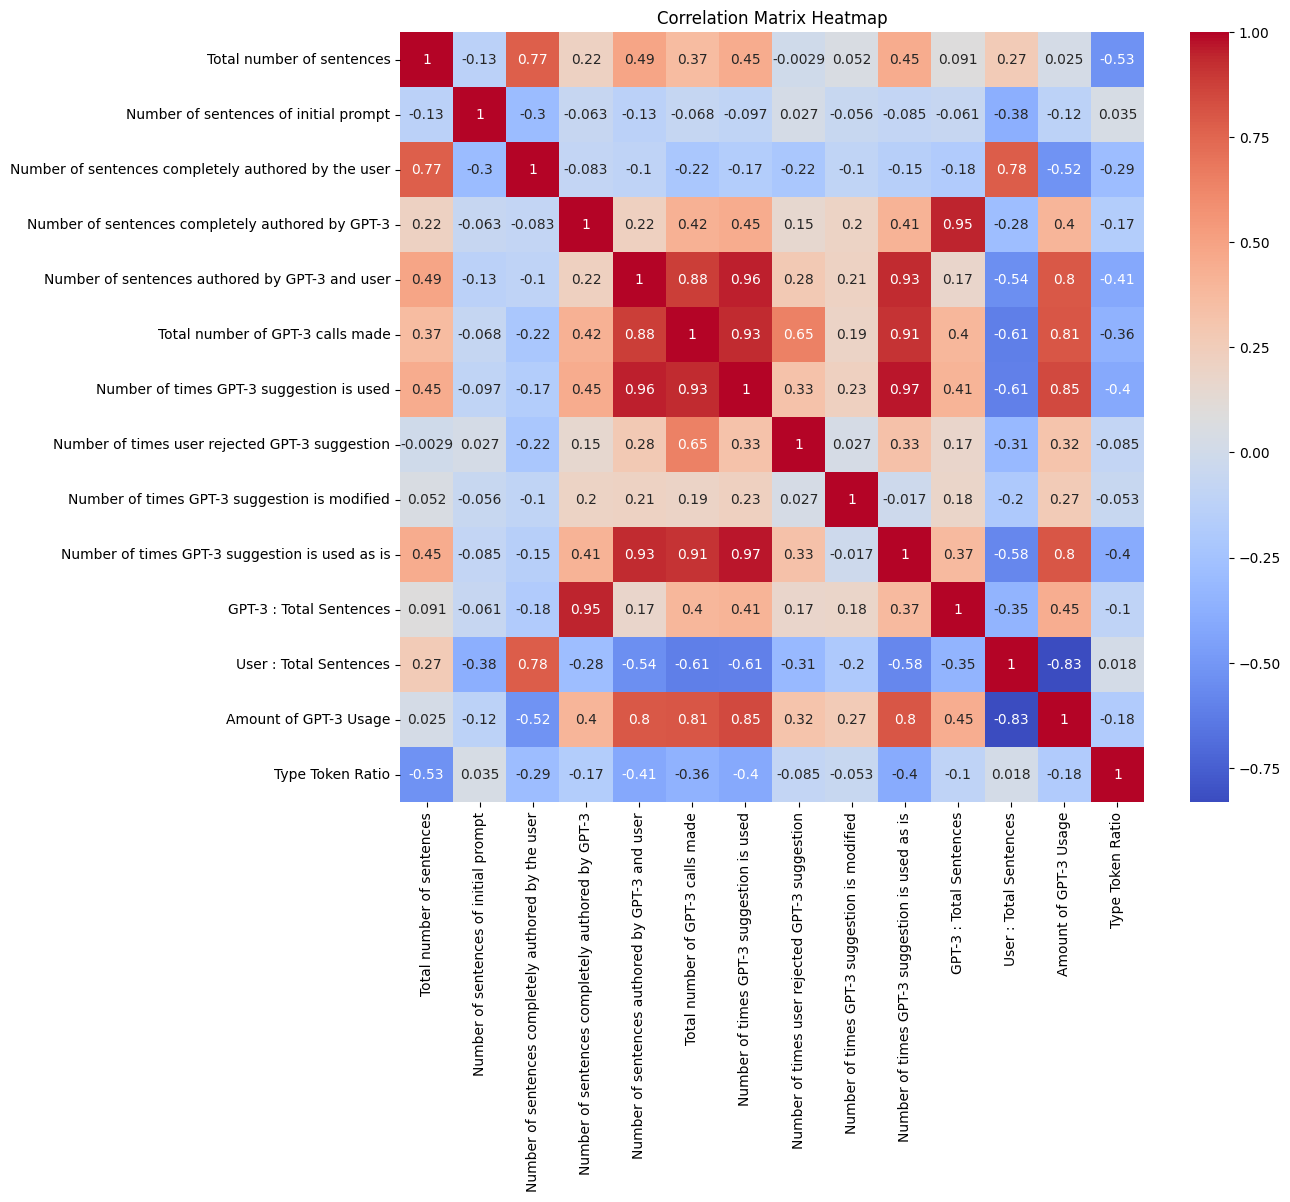

In [15]:
# Calculating correlation matrix
corr_matrix = data.corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
corr_plot = plt.show()
corr_plot

# Removing highly correlated features to remove redundancy
# Set correlation threshold (e.g., 0.9)
threshold = 0.9

# Finding correlated pairs of features
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Removing one feature from each correlated pair
to_remove = [pair[0] for pair in corr_pairs]
data_reduced = data.drop(columns=to_remove)

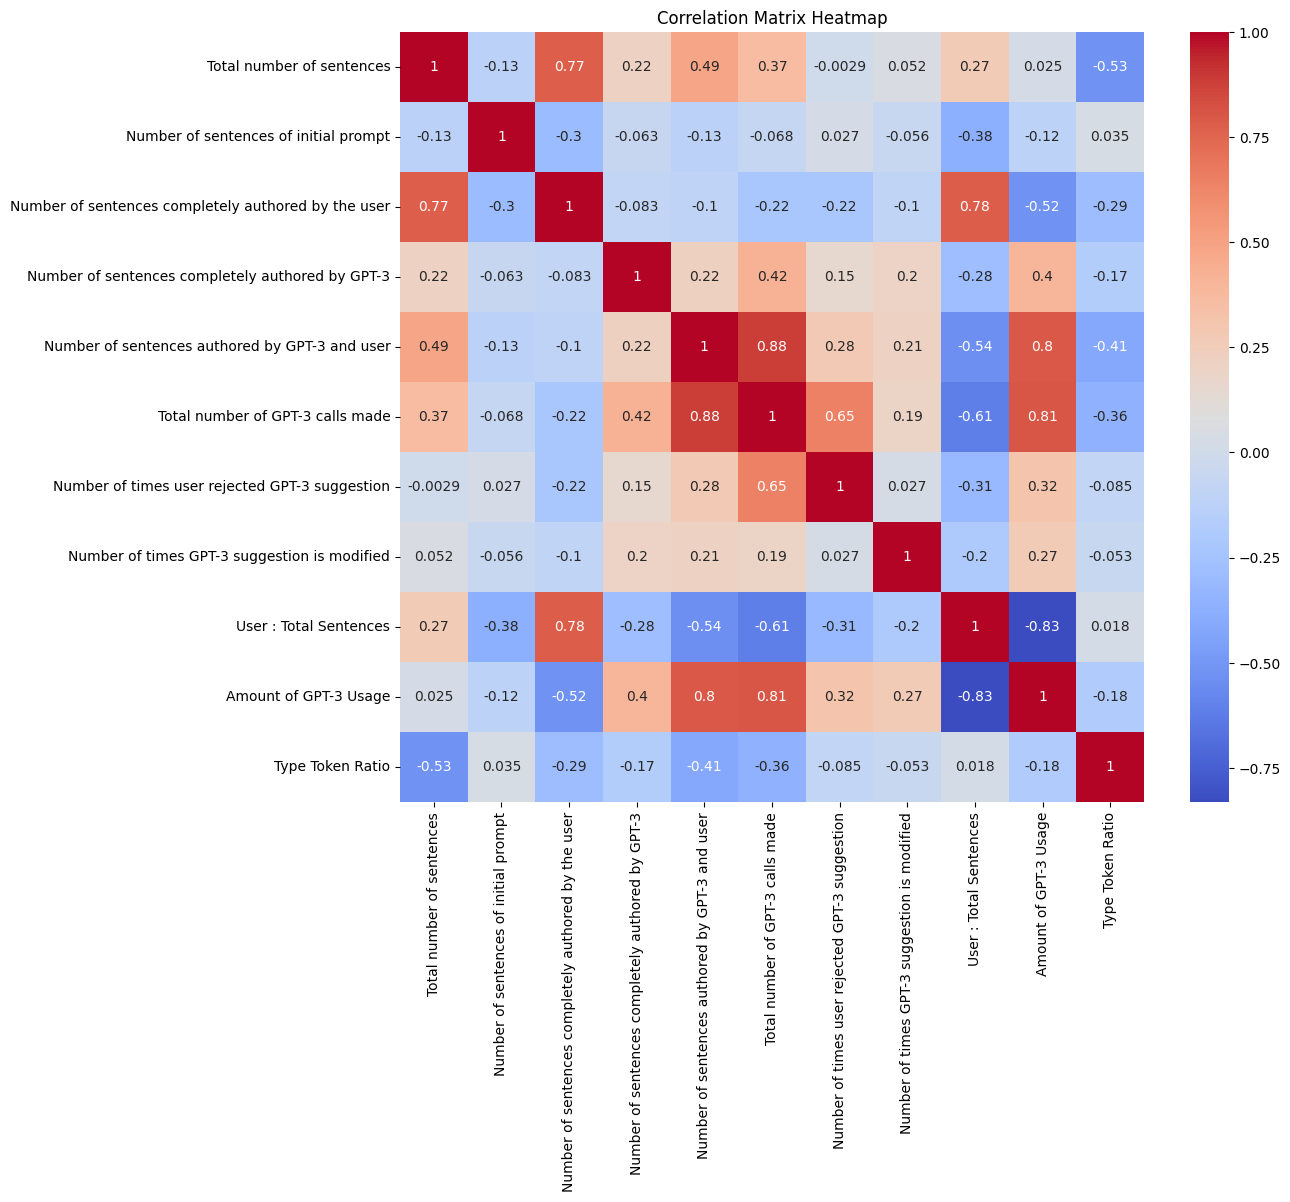

In [16]:
# Calculating correlation matrix
corr_matrix1 = data_reduced.corr()
#print(corr_matrix1)

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
corr_matt = plt.show()
corr_matt

Based on the provided correlation matrix, we can observe the following:

'Total number of sentences' is highly correlated with 'Number of sentences completely authored by the user' (0.77) and moderately correlated with 'Number of sentences authored by GPT-3 and user' (0.49). This indicates that as the total number of sentences in a document increases, the number of sentences authored by the user tends to increase.<br>
(It may show that the writers are mainly writing on their own)

'User : Total Sentences' (the ratio of sentences authored by the user to the total sentences) is highly correlated with 'Number of sentences completely authored by the user' (0.78). This suggests that the proportion of user-authored sentences increases as the user writes more autonomously. It is also negatively correlated in moderate terms with 'Number of sentences authored by GPT-3 and user' (-0.54) and 'Total number of GPT-3 calls made' (-0.61) which supports my previous statement that the writers are mainly writing on their own.

'Type Token Ratio' (a measure of lexical diversity) has a moderate negative correlation with 'Total number of sentences' (-0.53) and 'Number of sentences authored by GPT-3 and user' (-0.41). This suggests that lexical diversity tends to decrease as the number of total sentences and shared authorship with GPT-3 increases.

'Total number of GPT-3 calls made' is also highly correlated with 'Total number of sentences authored ny GPT-3 and user'(0.88) and is also moderately correlated with 'Number of times user rejected GPT-3 suggestion (0.65).

Based on these observations, I decided which columns to keep for clustering. Since the goal is to cluster writer profiles, I focused on columns that provide information about the user's writing behaviour and interaction with GPT-3. Here, I'm thinking of retaining the following columns:

1.   Total number of sentences
2.   Number of sentences of initial prompt
3.   Number of sentences completely authored by the user
4.   Number of sentences completely authored by GPT-3
5.   Number of sentences authored by GPT-3 and user
6.   Total number of GPT-3 calls made
7.   Number of times user rejected GPT-3 suggestion
8.   Number of times GPT-3 suggestion is modified
9.   User : Total Sentences
10.  Amount of GPT-3 Usage
11.  Type Token Ratio

These columns give information about how independent the user is as a writer, how much they rely on GPT-3, and how diverse their vocabulary is. These are all essential factors for clustering writer profiles.

I'll leave the following columns due to very high correlation (0.9) because it will be redundant.

1. Number of times GPT-3 suggestion is used as is
2. GPT-3 : Total Sentences
3. Number of times GPT-3 suggestion is used

In [17]:
data_reduced.head()

Total number of sentences  Number of sentences of initial prompt  \
0                         15                                      4   
1                         20                                      6   
2                         22                                      1   
3                         32                                      2   
4                         37                                      3   

   Number of sentences completely authored by the user  \
0                                                  6     
1                                                 10     
2                                                 18     
3                                                 18     
4                                                 24     

   Number of sentences completely authored by GPT-3  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 1   
4                                                 0   

   Number of sentences authored by GPT-3 and user  \
0                                               5   
1                                               4   
2                                               3   
3                                              11   
4                                              10   

   Total number of GPT-3 calls made  \
0                                 5   
1                                 6   
2                                 6   
3                                12   
4                                13   

   Number of times user rejected GPT-3 suggestion  \
0                                               0   
1                                               2   
2                                               3   
3                                               0   
4                                               3   

   Number of times GPT-3 suggestion is modified  User : Total Sentences  \
0                                             3                0.400000   
1                                             3                0.500000   
2                                             3                0.818182   
3                                             0                0.562500   
4                                             0                0.648649   

   Amount of GPT-3 Usage  Type Token Ratio  
0               0.333333          0.564706  
1               0.200000          0.613559  
2               0.136364          0.548476  
3               0.375000          0.469974  
4               0.270270          0.491135

In [18]:
print(len(data_reduced.columns))

11


### Finding Optimal clusters

In [19]:
# Defining a range of cluster numbers to test
cluster_range = range(2, 11)

# Initializing lists to store the evaluation metrics for K-means and Agglomerative Hierarchical clustering
kmeans_elbow = []
kmeans_silhouette = []
kmeans_calinski = []
agglo_silhouette = []
agglo_calinski = []

In [20]:
for k in cluster_range:
    # K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data_reduced)

    # Agglomerative Hierarchical clustering
    agglo = AgglomerativeClustering(n_clusters=k)
    agglo_clusters = agglo.fit_predict(data_reduced)

    # Evaluation metrics
    kmeans_elbow.append(kmeans.inertia_)
    kmeans_silhouette.append(silhouette_score(data_reduced, kmeans_clusters))
    kmeans_calinski.append(calinski_harabasz_score(data_reduced, kmeans_clusters))
    agglo_silhouette.append(silhouette_score(data_reduced, agglo_clusters))
    agglo_calinski.append(calinski_harabasz_score(data_reduced, agglo_clusters))

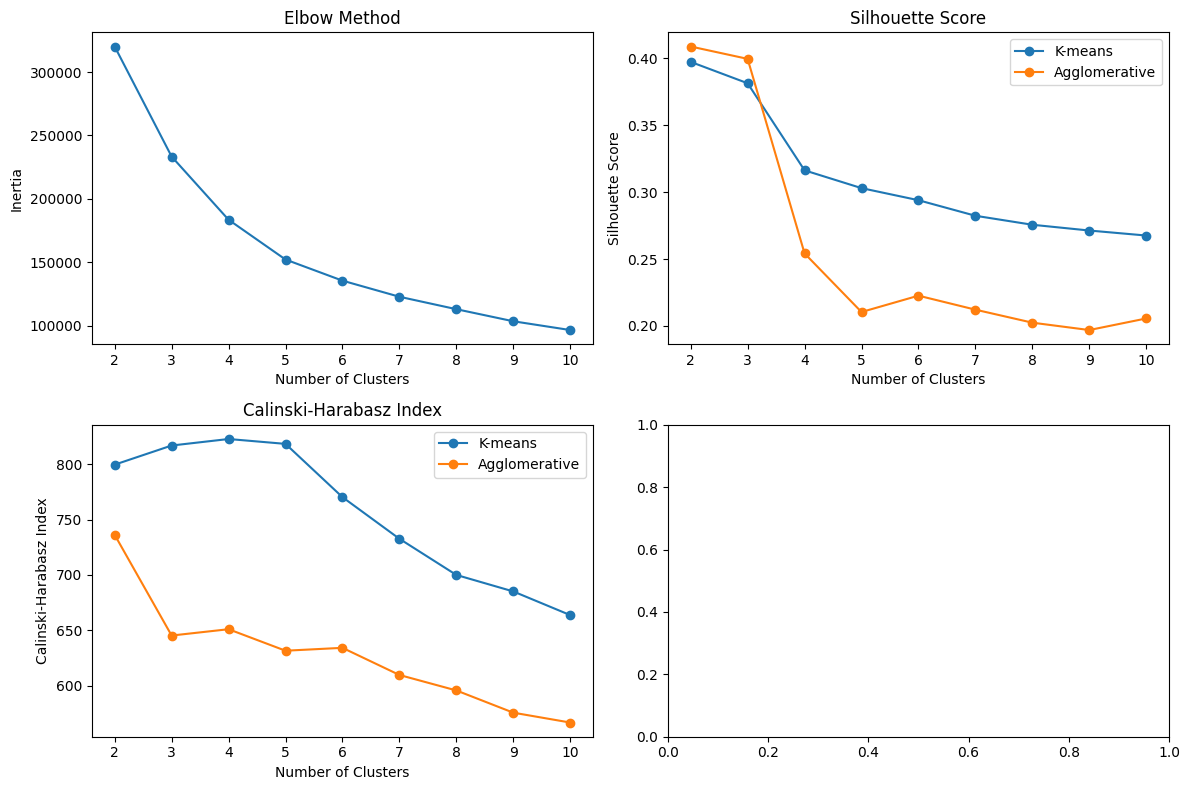

In [21]:
# Plotting the evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].plot(cluster_range, kmeans_elbow, 'o-', label='K-means')
axs[0, 0].set_title('Elbow Method')
axs[0, 0].set_xlabel('Number of Clusters')
axs[0, 0].set_ylabel('Inertia')

axs[0, 1].plot(cluster_range, kmeans_silhouette, 'o-', label='K-means')
axs[0, 1].plot(cluster_range, agglo_silhouette, 'o-', label='Agglomerative')
axs[0, 1].set_title('Silhouette Score')
axs[0, 1].set_xlabel('Number of Clusters')
axs[0, 1].set_ylabel('Silhouette Score')

axs[1, 0].plot(cluster_range, kmeans_calinski, 'o-', label='K-means')
axs[1, 0].plot(cluster_range, agglo_calinski, 'o-', label='Agglomerative')
axs[1, 0].set_title('Calinski-Harabasz Index')
axs[1, 0].set_xlabel('Number of Clusters')
axs[1, 0].set_ylabel('Calinski-Harabasz Index')

# Adding legends
axs[0, 1].legend()
axs[1, 0].legend()

# Adjusting layout and displaying plots
plt.tight_layout()
eval_mat = plt.show()
eval_mat

**From the above tests, specially from Calinski-Harabasz Index, we can deduce that the number of optimal clusters should be 3 or 4.**

### Feature scaling & Standardizing

In [22]:
# 4. Feature scaling
data_reduced = data_reduced[[
    "Total number of sentences",
    "Number of sentences of initial prompt",
    "Number of sentences completely authored by the user",
    "Number of sentences completely authored by GPT-3",
    "Number of sentences authored by GPT-3 and user",
    "Total number of GPT-3 calls made",
    "Number of times user rejected GPT-3 suggestion",
    "Number of times GPT-3 suggestion is modified",
    "User : Total Sentences",
    "Amount of GPT-3 Usage",
    "Type Token Ratio"
]]
data_reduced4mat = data_reduced.copy()
data_reduced3mat = data_reduced.copy()
# Applying standard scaling or Min-Max scaling to the dataset
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaled_data_red = scaler.fit_transform(data_reduced)
# Saving the preprocessed data
# preprocessed_data = pd.DataFrame(scaled_data, columns=data_reduced.columns)
preprocessed_data4mat = pd.DataFrame(scaled_data_red, columns=data_reduced.columns)
preprocessed_data3mat = preprocessed_data4mat.copy()

### Correlation Matrix and K-Means Clustering (4 Clusters)

In [23]:
# Applying K-means clustering (assuming 4 clusters for the 4 writer profiles)
kmeans4mat = KMeans(n_clusters=4, random_state=42)
kmeans4mat.fit(preprocessed_data4mat)

# Assigning cluster labels to the original data
data_reduced4mat['Cluster'] = kmeans4mat.labels_
cluster_centroids4 = data_reduced4mat.groupby("Cluster").mean()

#Printing the mean values of each feature for each cluster
print(cluster_centroids4)

         Total number of sentences  Number of sentences of initial prompt  \
Cluster                                                                     
0                        40.387931                               4.362069   
1                        39.908832                               2.831909   
2                        24.304858                               5.026801   
3                        22.714660                               4.952880   

         Number of sentences completely authored by the user  \
Cluster                                                        
0                                                11.931034     
1                                                27.811966     
2                                                15.668342     
3                                                 7.819372     

         Number of sentences completely authored by GPT-3  \
Cluster                                                     
0                             

We get the following characteristics of different clusters.

Cluster 0:

* High Total number of sentences
* Moderate reliance on the initial prompt
* Moderate number of sentences completely authored by the user
* High number of sentences completely authored by GPT-3
* High GPT-3 usage (many calls made)
* Low Type Token Ratio

Cluster 1:

* High Total number of sentences
* Low reliance on the initial prompt
* Very high number of sentences completely authored by the user
* Low number of sentences completely authored by GPT-3
* Low GPT-3 usage (fewer calls made)
* High Type Token Ratio

Cluster 2:

* Low Total number of sentences
* Moderate reliance on the initial prompt
* Moderate number of sentences completely authored by the user
* Very low number of sentences completely authored by GPT-3
* Low GPT-3 usage (fewer calls made)
* High Type Token Ratio

Cluster 3:

* Low Total number of sentences
* Moderate reliance on the initial prompt
* Very low number of sentences completely authored by the user
* Low number of sentences completely authored by GPT-3
* Moderate GPT-3 usage (moderate calls made)
* High Type Token Ratio

### PCA

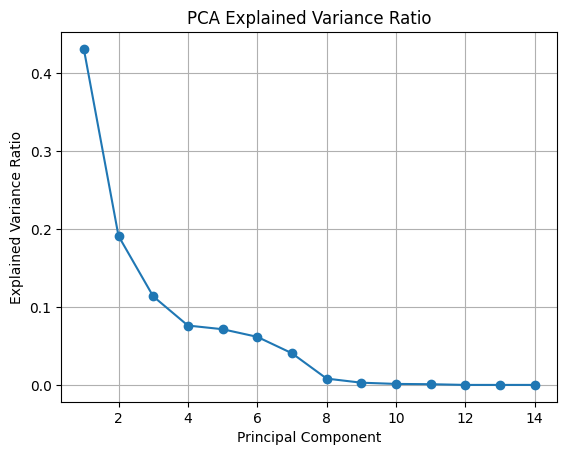

In [24]:
# Applying standard scaling or Min-Max scaling to the dataset
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaled_data_pca = scaler.fit_transform(data)
# Save the preprocessed data
preprocessed_data_pca = pd.DataFrame(scaled_data_pca, columns=data.columns)

# Performing PCA
pca = PCA()
data_pca = pca.fit_transform(preprocessed_data_pca)

# Plot explained variance ratio for each principal component
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid()
pca_evr = plt.show()
pca_evr

In [25]:
# Based on the plot, choosing the number of components that capture most of the variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance > 0.95) + 1
#Or, I can just set n_components = 7
pca = PCA(n_components=n_components)
data_pca1 = pca.fit_transform(scaled_data_pca)

### K-Means Clustering (4 Clusters)

In [149]:
# Performing clustering
kmeans4pca = KMeans(n_clusters=4, random_state=42)
labels = kmeans4pca.fit_predict(data_pca1)

# Analyzing and profiling writers based on the clustering results
data4kmeans = data.copy()
data4kmeans['Cluster'] = labels
grouped = data4kmeans.groupby('Cluster').mean()
print(grouped)

         Total number of sentences  Number of sentences of initial prompt  \
Cluster                                                                     
0                        21.546798                               5.183908   
1                        33.804924                               3.583333   
2                        34.053571                               3.589286   
3                        35.581028                               4.517787   

         Number of sentences completely authored by the user  \
Cluster                                                        
0                                                10.533662     
1                                                24.882576     
2                                                10.875000     
3                                                13.142292     

         Number of sentences completely authored by GPT-3  \
Cluster                                                     
0                             

We get the following characteristics of different clusters.

Collaborative Writers (Cluster 0)
* High total number of sentences
* High GPT-3 usage, with a higher number of GPT-3 suggestions used and highest number of sentences authored by GPT-3 and user
* Moderate User : Total Sentences ratio
* Moderate Type Token Ratio

Independent Creators (Cluster 1)
* Highest total number of sentences authored by the user
* Lowest GPT-3 usage, both in the number of calls made and the number of sentences authored by GPT-3
* Higher User : Total Sentences ratio
* Higher Type Token Ratio, indicating a more diverse vocabulary

Meticulous Crafters (Cluster 2)
* Lowest total number of sentences
* Low GPT-3 usage, with low number of calls made, and low GPT-3-authored sentences
* Higher User : Total Sentences ratio compared to Collaborative and Exploratory Writers
* Highest Type Token Ratio, indicating a more diverse vocabulary and more creative writing

Idea Explorers(Brainstorming & Lazy Writers) (Cluster 3)
* Moderate to high total number of sentences
* Highest GPT-3 usage, with a highest number of calls made and a highest number of GPT-3-authored sentences
* Lower User : Total Sentences ratio compared to Independent Creators and Meticulous Crafters
* Moderate Type Token Ratio

In [150]:
# Creating a list of original column names called 'column_names'
column_names = [preprocessed_data_pca.columns]

# Creating a DataFrame with the weights of each original feature in the principal components
principal_component_weights = pd.DataFrame(pca.components_, columns=column_names)

# Adding a column for the principal component number
principal_component_weights['Principal Component'] = ['PC' + str(i+1) for i in range(principal_component_weights.shape[0])]

# Rearranging the DataFrame to have the principal component number as the index
principal_component_weights = principal_component_weights.set_index('Principal Component')

print(principal_component_weights)

                    Total number of sentences  \
Principal Component                             
(PC1,)                               0.131704   
(PC2,)                               0.539549   
(PC3,)                              -0.006715   
(PC4,)                               0.159178   
(PC5,)                               0.138861   
(PC6,)                               0.056002   
(PC7,)                              -0.324158   

                    Number of sentences of initial prompt  \
Principal Component                                         
(PC1,)                                          -0.017712   
(PC2,)                                          -0.244638   
(PC3,)                                          -0.138607   
(PC4,)                                           0.722598   
(PC5,)                                           0.429286   
(PC6,)                                           0.169008   
(PC7,)                                          -0.259927   

        

As visualizing a 7-dimensional PCA result is not possible directly since we are limited to 2D or 3D plots, we will create a a pairplot or a scatterplot matrix to visualize the relationships between all the principal components pairwise. This will allow me to observe the clustering patterns in each 2D projection.

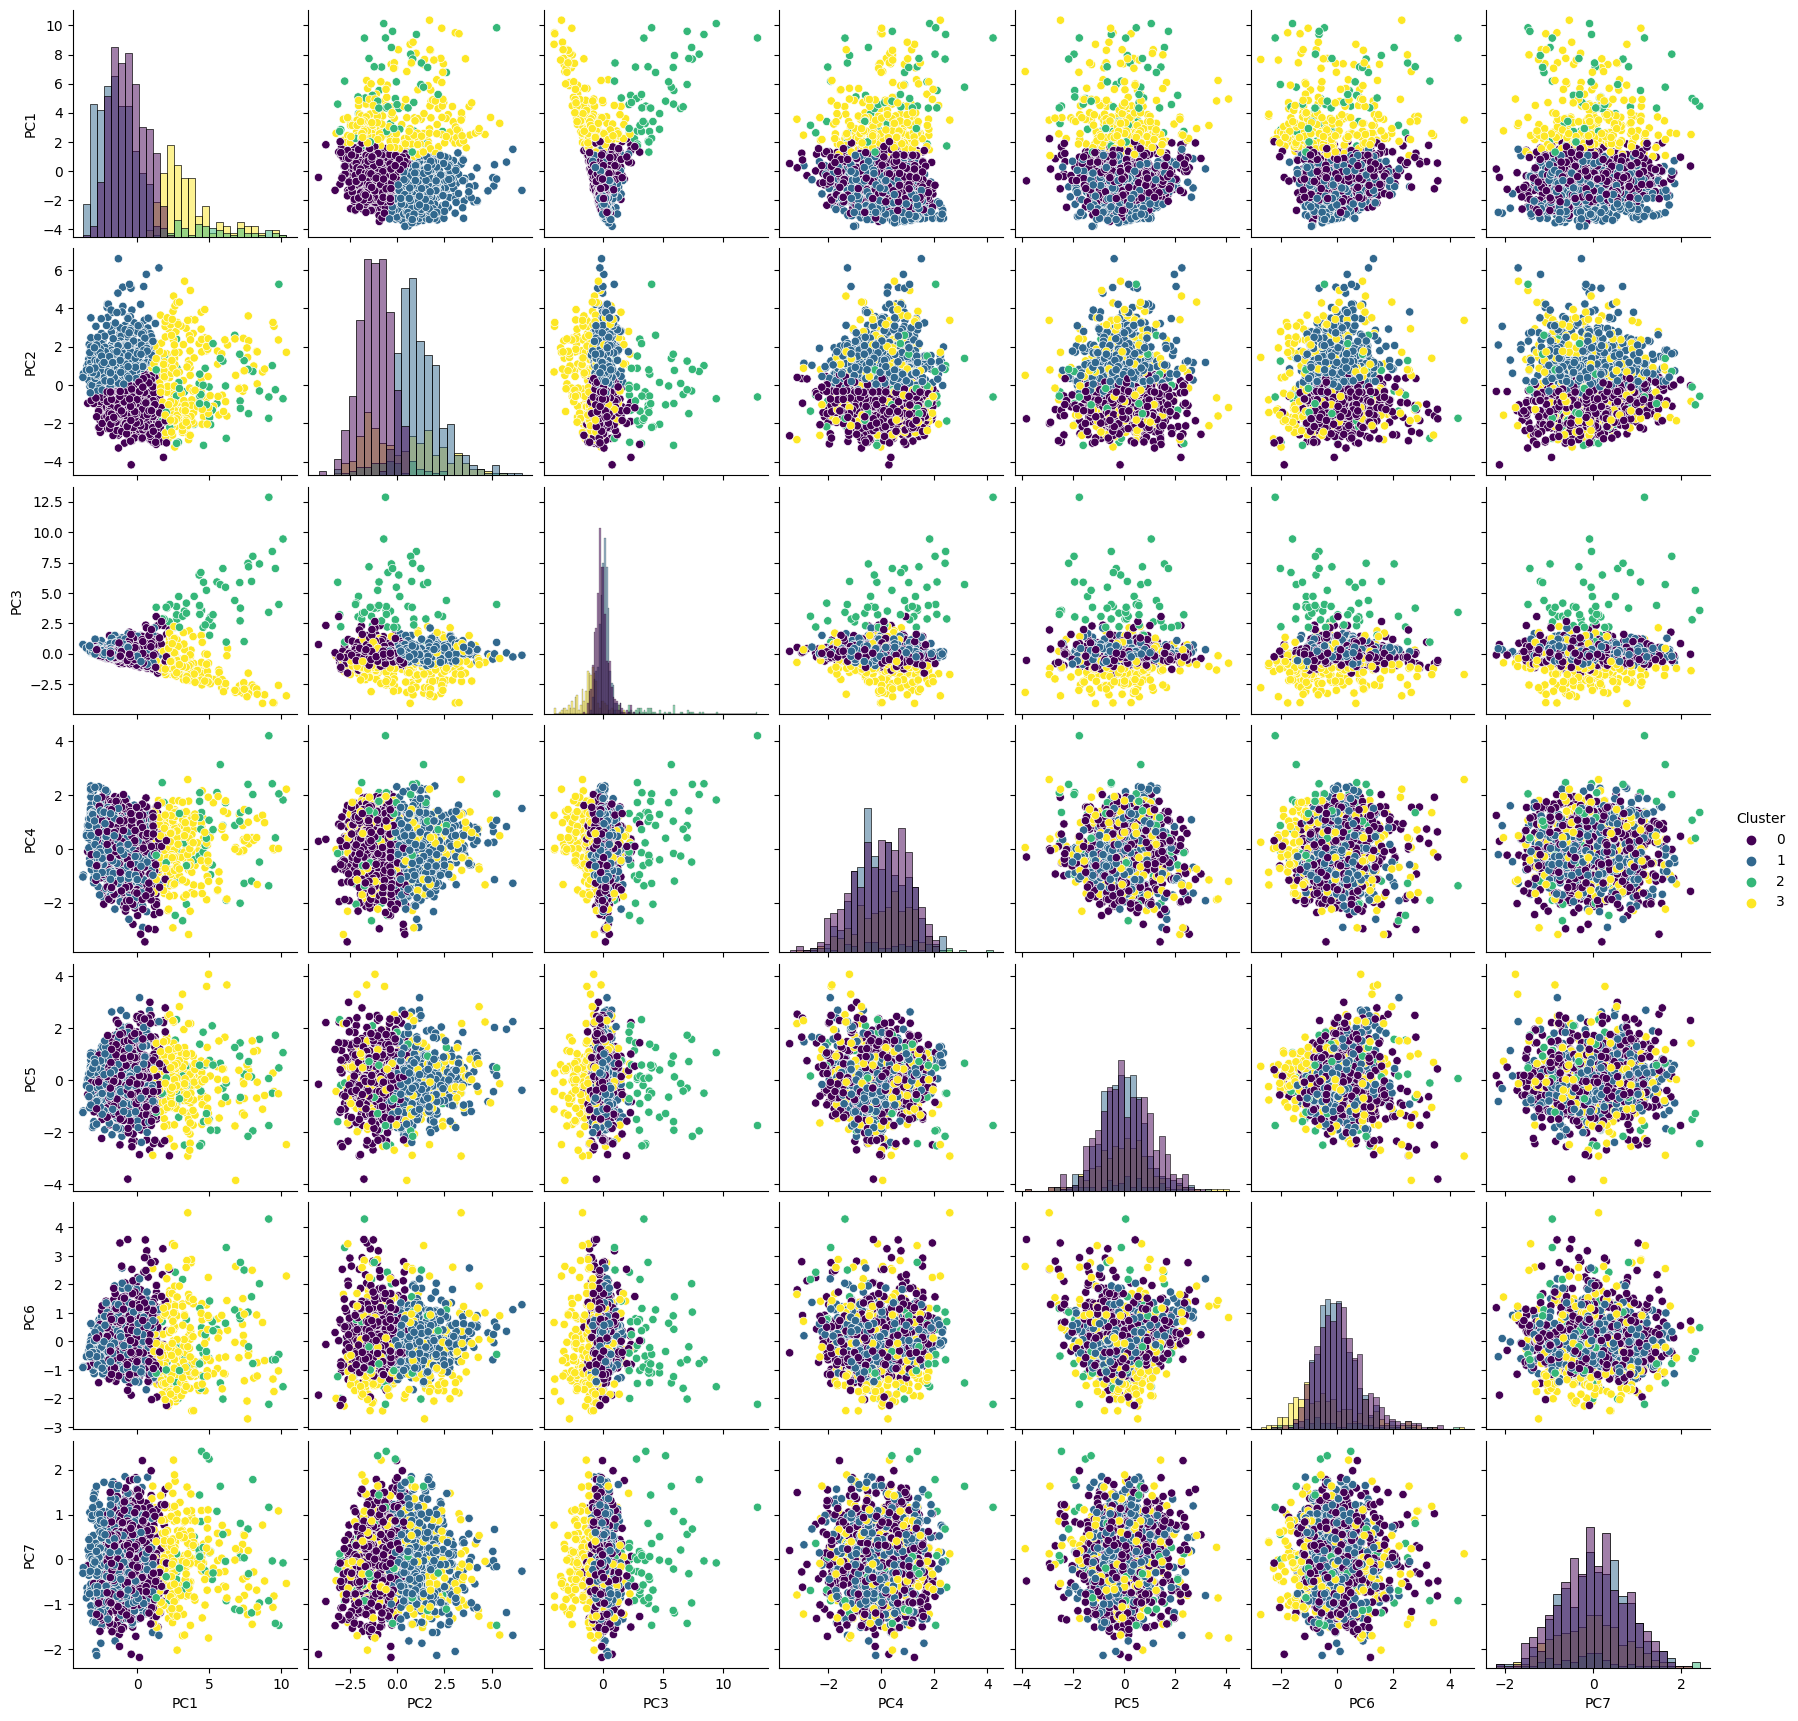

In [151]:
# Creating a new DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data_pca1, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['Cluster'] = labels

# Visualizing the pairwise relationships using Seaborn's pairplot
sns.pairplot(pca_df, hue='Cluster', diag_kind='hist', markers='o', palette='viridis')
pca4_7d = plt.show()
pca4_7d

Since the above plots are difficult to understand we will reduce the PCA components to 2 and 3 for 2D and 3D plots

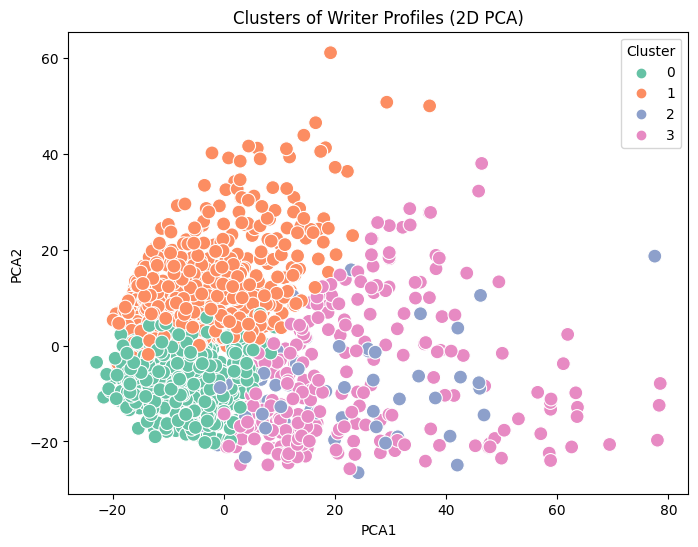

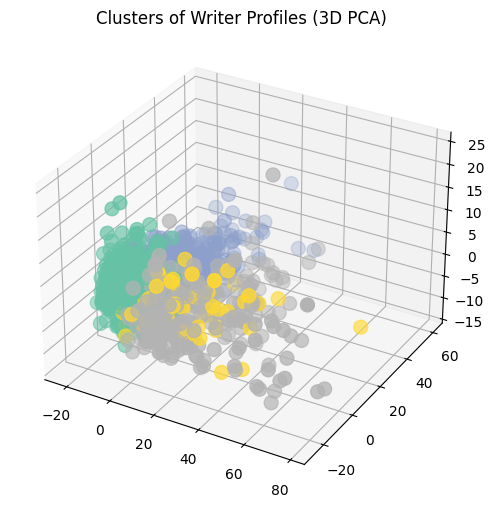

In [152]:
# Reducing dimensionality to 2D using PCA
pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(data)

# Creating a DataFrame with the PCA results and cluster labels
data_pca_2d_df = pd.DataFrame(data_pca_2d, columns=["PCA1", "PCA2"])
data_pca_2d_df["Cluster"] = kmeans4pca.labels_

# Plotting the 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=data_pca_2d_df, palette="Set2", s=100
)
plt.title("Clusters of Writer Profiles (2D PCA)")
pca4_2d = plt.show()
pca4_2d

# Reducing dimensionality to 3D using PCA
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data)

# Creating a DataFrame with the PCA results and cluster labels
data_pca_3d_df = pd.DataFrame(data_pca_3d, columns=["PCA1", "PCA2", "PCA3"])
data_pca_3d_df["Cluster"] = kmeans4pca.labels_

# Plotting the 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    data_pca_3d_df["PCA1"],
    data_pca_3d_df["PCA2"],
    data_pca_3d_df["PCA3"],
    c=data_pca_3d_df["Cluster"],
    cmap="Set2",
    s=100,
)

plt.title("Clusters of Writer Profiles (3D PCA)")
pca4_3d = plt.show()
pca4_3d

**Collaborative Writers (Cluster 0)**

Collaborative Writers are those who effectively balance their own input and GPT-3's suggestions. They have a moderate total number of sentences, GPT-3 usage, and User : Total Sentences ratio. These writers engage in a collaborative process with GPT-3, using the AI's suggestions to supplement their own ideas and writing. They have a moderate Type Token Ratio, indicating a balanced mix of vocabulary from both user and GPT-3 inputs. Collaborative Writers can leverage the strengths of GPT-3 while maintaining their personal writing style.

**Independent Creators (Cluster 1)**

Independent Creators are writers who prefer to express their own ideas. They make a low number of GPT-3 calls and the number of sentences completely authored by GPT-3 is relatively low. This results in a higher User : Total Sentences ratio compared to Collaborative and Exploratory Writers. Independent Creators have the 2nd highest Type Token Ratio, indicating a more diverse vocabulary. These writers ultimately rely on their own creativity and unique writing style.

**Meticulous Crafters (Cluster 2)**

Meticulous Crafters are writers who take great care in crafting their content. They mostly rely on their own ideas and writing, with a high percentage of sentences completely authored by the user. Their use of GPT-3 is minimal, both in terms of calls made and sentences completely authored by GPT-3. This results in a higher User : Total Sentences ratio. Meticulous Crafters tend to have a diverse vocabulary, as evidenced by their higher Type Token Ratio. These writers are likely to spend more time refining their work and strive for quality over quantity.

**Exploratory Writers (Cluster 3)**

Exploratory Writers are those who actively experiment with GPT-3's capabilities, making the highest number of GPT-3 calls and having a higher number of GPT-3-authored sentences. Their User : Total Sentences ratio is lower compared to Independent Creators and Meticulous Crafters. These writers are more open to incorporating GPT-3 suggestions into their work, often using the AI-generated content as a starting point or inspiration for further writing. Their Type Token Ratio is moderate, reflecting a blend of their own vocabulary and that of GPT-3. Exploratory Writers are likely to take advantage of GPT-3's capabilities to generate new ideas and directions for their writing.

### Correlation Matrix and K-Means Clustering (3 Clusters)

In [26]:
# Applying K-means clustering (assuming 3 clusters for the 3 writer profiles)
kmeans3mat = KMeans(n_clusters=3, random_state=42)
kmeans3mat.fit(preprocessed_data3mat)

# Assigning cluster labels to the original data
data_reduced3mat['Cluster'] = kmeans3mat.labels_
cluster_centroids3 = data_reduced3mat.groupby("Cluster").mean()

#Printing the mean values of each feature for each cluster
print(cluster_centroids3)

         Total number of sentences  Number of sentences of initial prompt  \
Cluster                                                                     
0                        34.596552                               3.482759   
1                        34.276000                               4.488000   
2                        21.501623                               5.277597   

         Number of sentences completely authored by the user  \
Cluster                                                        
0                                                24.867241     
1                                                10.836000     
2                                                10.316558     

         Number of sentences completely authored by GPT-3  \
Cluster                                                     
0                                                0.308621   
1                                                2.428000   
2                                                

Independent Creators (Cluster 0):
* Minimal reliance on GPT-3, with an average of 8.67 calls made and a GPT-3 usage amount of 0.17.
* Generate content primarily with their own writing, with mean approximate 72.00% of sentences being user-authored.
* Tend to have a lower number of sentences in the initial prompt (3.48).
* Produce a moderate number of total sentences (34.60) compared to other clusters.
* Have a moderate Type Token Ratio (0.47), indicating a reasonably diverse vocabulary and creative writing.

GPT-3 Reliant Writers (Cluster 1):
* Heavily rely on GPT-3, with an average of 27.82 calls made and a GPT-3 usage amount of 0.56.
* Generate content with a lower proportion of user-authored sentences (29.20%) and a higher proportion of increase in GPT-3-authored sentences (684%) from other clusters.
* Tend to have a higher number of sentences in the initial prompt (4.49).
* Produce a moderate number of total sentences (34.28) compared to other clusters.
* Have a lower Type Token Ratio (0.44), indicating less diverse vocabulary and creative writing compared to other clusters.

Balanced Collaborators (Cluster 2):
* Moderate reliance on GPT-3, with an average of 9.96 calls made and a GPT-3 usage amount of 0.28.
* Generate content with a mix of their own writing and GPT-3 suggestions, with 47.41% of sentences being user-authored.
* Tend to have a higher number of sentences in the initial prompt (5.28).
* Produce relatively fewer total sentences (21.50) compared to other clusters.
* Have the highest Type Token Ratio (0.51), indicating diverse vocabulary and creative writing.

### PCA and K-Means Clustering (3 Clusters)

In [27]:
# Performing clustering
kmeans3pca = KMeans(n_clusters=3, random_state=42)
labels1 = kmeans3pca.fit_predict(data_pca1)

# Analyzing and profiling writers based on the clustering results
data3kmeans = data.copy()
data3kmeans['Cluster'] = labels1
grouped1 = data3kmeans.groupby('Cluster').mean()
print(grouped1)

         Total number of sentences  Number of sentences of initial prompt  \
Cluster                                                                     
0                        21.711443                               5.298507   
1                        35.944444                               4.281481   
2                        33.303665                               3.563700   

         Number of sentences completely authored by the user  \
Cluster                                                        
0                                                10.225539     
1                                                12.592593     
2                                                24.294939     

         Number of sentences completely authored by GPT-3  \
Cluster                                                     
0                                                0.318408   
1                                                2.500000   
2                                                

Independent Creators (Cluster 2):
* Minimal reliance on GPT-3, with an average of 7.72 calls made and a GPT-3 usage amount of 0.16.
* Generate content primarily with their own writing, with 72.84% of sentences being user-authored.
* Tend to have a lower number of sentences in the initial prompt (3.56).
* Produce a moderate number of total sentences (33.30) compared to other clusters.
* Have a moderate Type Token Ratio (0.47), indicating a reasonably diverse vocabulary and creative writing.

GPT-3 Reliant Writers (Cluster 1):
* Heavily rely on GPT-3, with an average of 27.01 calls made and a GPT-3 usage amount of 0.55.
* Generate content with a lower proportion of user-authored sentences (31.50%) and a higher proportion of increase in GPT-3-authored sentences (681-1036%) from other clusters.
* Tend to have a moderately high number of sentences in the initial prompt (4.28).
* Produce a higher number of total sentences (35.94) compared to other clusters which can be assumed due to the reason of easy sentence generation by GPT-3.
* Have a lower Type Token Ratio (0.44), indicating less diverse vocabulary and creative writing compared to other clusters.

Balanced Collaborators (Cluster 0):
* Moderate reliance on GPT-3, with an average of 10.62 calls made and a GPT-3 usage amount of 0.29.
* Generate content with a mix of their own writing and GPT-3 suggestions, with 46.48% of sentences being user-authored.
* Tend to have a higher number of sentences in the initial prompt (5.30).
* Produce relatively fewer total sentences (21.71) compared to other clusters.
* Have the highest Type Token Ratio (0.51), indicating diverse vocabulary and creative writing.

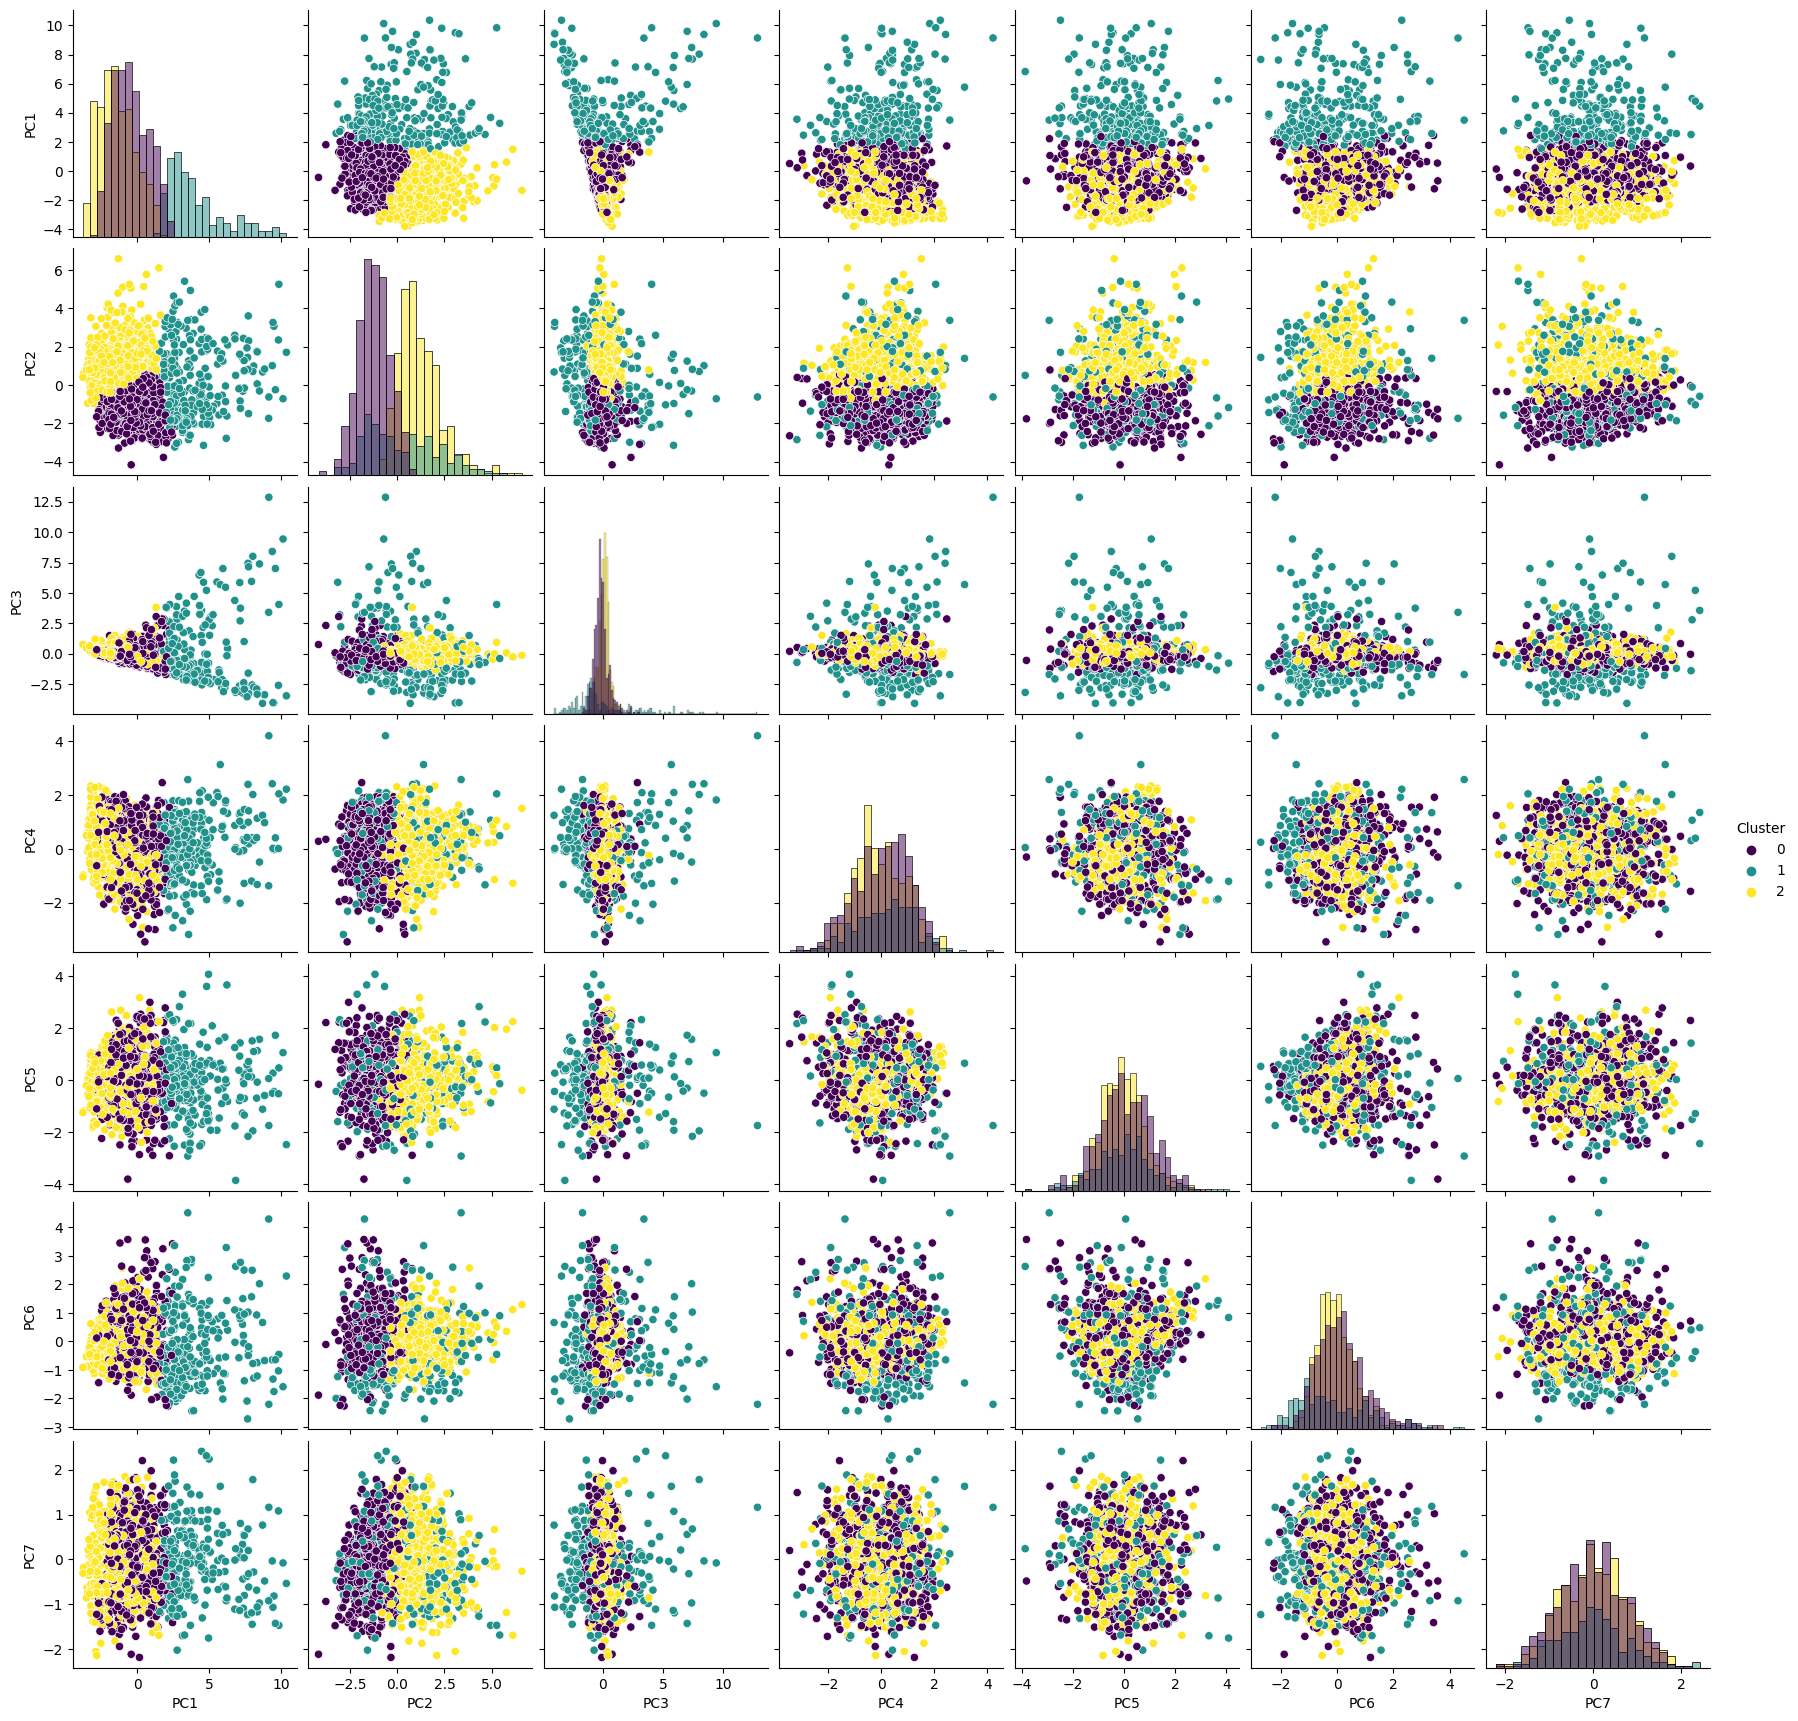

In [28]:
# Creating a new DataFrame with PCA components and cluster labels
pca_df1 = pd.DataFrame(data_pca1, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df1['Cluster'] = labels1

# Visualizing the pairwise relationships using Seaborn's pairplot
sns.pairplot(pca_df1, hue='Cluster', diag_kind='hist', markers='o', palette='viridis')
pca3_7d = plt.show()
pca3_7d

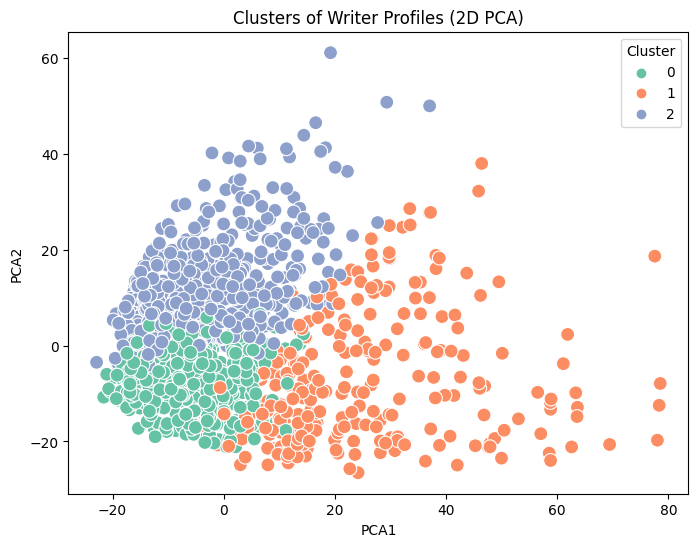

In [29]:
# Reducing dimensionality to 2D using PCA
pca1_2d = PCA(n_components=2)
data_pca1_2d = pca1_2d.fit_transform(data)

# Creating a DataFrame with the PCA results and cluster labels
data_pca1_2d_df = pd.DataFrame(data_pca1_2d, columns=["PCA1", "PCA2"])
data_pca1_2d_df["Cluster"] = kmeans3pca.labels_

# Plotting the 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=data_pca1_2d_df, palette="Set2", s=100
)
plt.title("Clusters of Writer Profiles (2D PCA)")
cluster_2d = plt.show()
cluster_2d

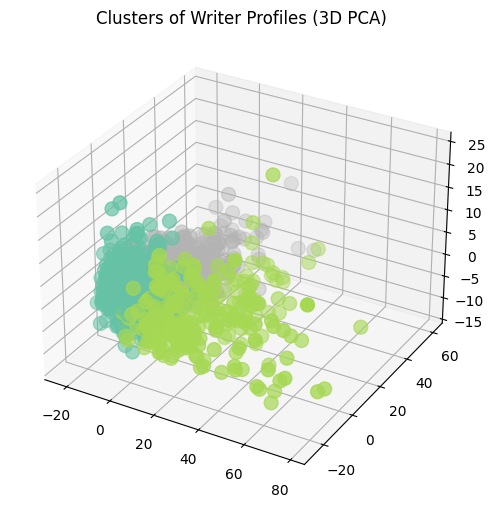

In [30]:
# Reducing dimensionality to 3D using PCA
pca1_3d = PCA(n_components=3)
data_pca1_3d = pca1_3d.fit_transform(data)

# Creating a DataFrame with the PCA results and cluster labels
data_pca1_3d_df = pd.DataFrame(data_pca1_3d, columns=["PCA1", "PCA2", "PCA3"])
data_pca1_3d_df["Cluster"] = kmeans3pca.labels_

# Plotting the 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    data_pca1_3d_df["PCA1"],
    data_pca1_3d_df["PCA2"],
    data_pca1_3d_df["PCA3"],
    c=data_pca1_3d_df["Cluster"],
    cmap="Set2",
    s=100,
)

plt.title("Clusters of Writer Profiles (3D PCA)")
cluster_3d = plt.show()
cluster_3d

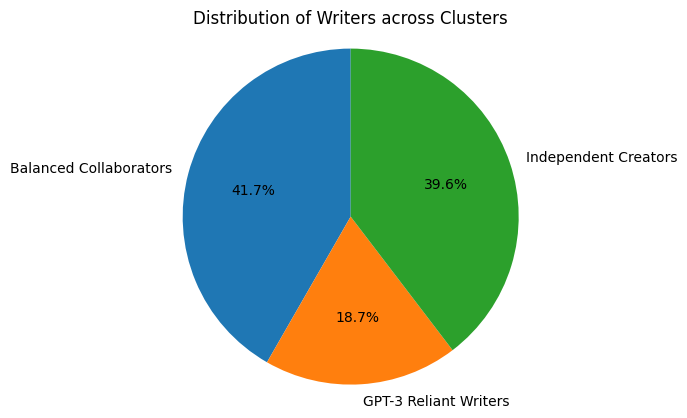

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_count = data3kmeans['Cluster'].value_counts()

labels = ['Balanced Collaborators', 'GPT-3 Reliant Writers', 'Independent Creators']
sizes = [cluster_count[0], cluster_count[1], cluster_count[2]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Distribution of Writers across Clusters')
cluster_dist = plt.show()
cluster_dist

Independent Creators:
* They show minimal reliance on GPT-3, with an average of 8-10 calls made and a GPT-3 usage amount of 0.17-0.28.
* They generate content primarily with their own writing, with 72% of sentences being user-authored.
* These writers have a lower number of sentences in the initial prompt (~3).
* They produce a moderate number of total sentences (33-34) compared to other clusters.
* They have a moderate to high Type Token Ratio (0.47), indicating a reasonably diverse vocabulary and creative writing.

GPT-3 Reliant Writers:
* These writers rely more heavily on GPT-3, with an average of 27-28 calls made and a GPT-3 usage amount of 0.56.
* They generate content with a lower proportion of user-authored sentences (29-32%) a higher proportion of increase in GPT-3-authored sentences (681-1036%) from other clusters.
* They tend to have a higher number of sentences in the initial prompt (4-5).
* They produce a moderate number of total sentences (34-36) compared to other clusters.
* They have a lower Type Token Ratio (0.44), indicating less diverse vocabulary and creative writing compared to other clusters.

Balanced Collaborators:
* They have a moderate reliance on GPT-3, with an average of 10-11 calls made and a GPT-3 usage amount of 0.28-0.29.
* They generate content with a mix of their own writing and GPT-3 suggestions, with 46-48% of sentences being user-authored.
* These writers have a higher number of sentences in the initial prompt (5.28-5.3).
* They produce relatively fewer total sentences (21-22) compared to other clusters.
* They have the highest Type Token Ratio (0.51), indicating diverse vocabulary and creative writing.

Clusters count per session:

0 (Balanced Collaborators): 603

2 (Independent Creators): 573

1 (GPT-3 Reliant Writers): 270

Grand Total: 1446


In [158]:
# Saving the results to a CSV file
# data3kmeans.to_csv('clustered_dataset.csv', index=False)

In [196]:
grouped1

Total number of sentences  Number of sentences of initial prompt  \
Cluster                                                                     
0                        21.711443                               5.298507   
1                        35.944444                               4.281481   
2                        33.303665                               3.563700   

         Number of sentences completely authored by the user  \
Cluster                                                        
0                                                10.225539     
1                                                12.592593     
2                                                24.294939     

         Number of sentences completely authored by GPT-3  \
Cluster                                                     
0                                                0.318408   
1                                                2.500000   
2                                                0.216405   

         Number of sentences authored by GPT-3 and user  \
Cluster                                                   
0                                              5.868988   
1                                             16.570370   
2                                              5.228621   

         Total number of GPT-3 calls made  \
Cluster                                     
0                               10.616915   
1                               27.014815   
2                                7.720768   

         Number of times GPT-3 suggestion is used  \
Cluster                                             
0                                        6.530680   
1                                       21.185185   
2                                        5.497382   

         Number of times user rejected GPT-3 suggestion  \
Cluster                                                   
0                                              4.086235   
1                                              5.829630   
2                                              2.223386   

         Number of times GPT-3 suggestion is modified  \
Cluster                                                 
0                                            1.751244   
1                                            1.996296   
2                                            1.219895   

         Number of times GPT-3 suggestion is used as is  \
Cluster                                                   
0                                              4.779436   
1                                             19.188889   
2                                              4.277487   

         GPT-3 : Total Sentences  User : Total Sentences  \
Cluster                                                    
0                       0.013969                0.464770   
1                       0.073614                0.314967   
2                       0.005878                0.728389   

         Amount of GPT-3 Usage  Type Token Ratio  
Cluster                                           
0                     0.285120          0.509325  
1                     0.550223          0.439094  
2                     0.159622          0.473054

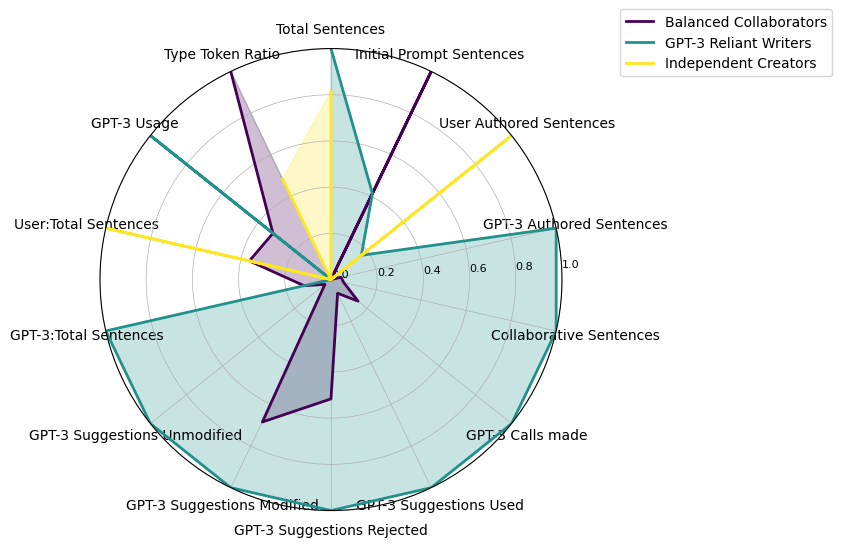

In [194]:
# Creating a dictionary of shorter column names
short_labels = {
    'Total number of sentences': 'Total Sentences',
    'Number of sentences of initial prompt': 'Initial Prompt Sentences',
    'Number of sentences completely authored by the user': 'User Authored Sentences',
    'Number of sentences completely authored by GPT-3': 'GPT-3 Authored Sentences',
    'Number of sentences authored by GPT-3 and user': 'Collaborative Sentences',
    'Total number of GPT-3 calls made': 'GPT-3 Calls made',
    'Number of times GPT-3 suggestion is used': 'GPT-3 Suggestions Used',
    'Number of times user rejected GPT-3 suggestion': 'GPT-3 Suggestions Rejected',
    'Number of times GPT-3 suggestion is modified': 'GPT-3 Suggestions Modified',
    'Number of times GPT-3 suggestion is used as is': 'GPT-3 Suggestions Unmodified',
    'GPT-3 : Total Sentences': 'GPT-3:Total Sentences',
    'User : Total Sentences': 'User:Total Sentences',
    'Amount of GPT-3 Usage': 'GPT-3 Usage',
    'Type Token Ratio': 'Type Token Ratio'
}

# Normalizing the values for better visualization
scaler1 = MinMaxScaler()
normalized_means = pd.DataFrame(scaler1.fit_transform(grouped1), columns=grouped1.columns)
# Replacing the long column names with shorter ones
short_means2 = normalized_means.rename(columns=short_labels)

# Number of features
num_vars = len(short_means2.columns)

# Computing angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Creating the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Defining the writer profile names
writer_profiles = ['Balanced Collaborators', 'GPT-3 Reliant Writers', 'Independent Creators']

# Plotting each cluster
for i, row in short_means2.iterrows():
    color = plt.cm.viridis(i / 2)  # Choose a color for each cluster
    ax.plot(angles, row.values, color=color, linewidth=2, label=writer_profiles[i])
    ax.fill(angles, row.values, color=color, alpha=0.25)

# Configuring the radar chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels=short_means2.columns)
ax.set_rlabel_position(180 / num_vars)

# Configuring gridlines and ticks
ax.yaxis.grid(linewidth=0.5)
ax.xaxis.grid(linewidth=0.5)
ax.set_ylim(0, 1)
yticks = np.arange(0, 1.1, 0.2)
yticks[0] = 0.0
ax.set_yticks(yticks)
ax.set_yticklabels(np.round(yticks, 1), fontsize=8, x=1.3)

# Configuring legend
ax.legend(loc='upper right', bbox_to_anchor=(1.6, 1.1), fontsize=10)
radar_chart = plt.show()
radar_chart

In [160]:
# short_means2.to_csv('short_means2.csv', index=False)

In [161]:
#!pip install nbformat

In [33]:
# Defining the different writer profiles
writer_profiles = {
    0: 'Balanced Collaborators',
    1: 'GPT-3 Reliant Writers',
    2: 'Independent Creators'
}

# Renaming the columns and resetting the index
short_means = normalized_means.rename(columns=short_labels)
short_means.reset_index(inplace=True)

# Adding a column with the writer profiles for each row
short_means['Writer Profiles'] = short_means['index'].map(writer_profiles)

# Defining the colors to be used in the radar chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


# Defining the dimensions of the radar chart
dimensions = [
    {
        'label': label,
        'values': short_means[label],
        'tickangle': 90,
        'range': [short_means[label].min(), short_means[label].max()]
    } for label in short_labels.values()
]

# Creating the figure for the radar chart
fig = go.Figure()

# Iterating over each writer profile to add the corresponding trace to the chart
for i, profile in enumerate(short_means['Writer Profiles'].unique()):
    fig.add_trace(go.Scatterpolar(
        # Setting the values for the trace
        r=short_means[short_means['Writer Profiles'] == profile].iloc[0][list(short_labels.values())],
        theta=list(short_labels.values()),
        mode='lines',
        name=profile,
        # Setting the line color and shape
        line=dict(color=colors[i], shape='spline', smoothing=1),
        opacity=1.0,
        hoverinfo='none'
    ))

# Updating the layout of the chart
fig.update_layout(
    # Customizing the radial axis
    polar=dict(
        radialaxis=dict(
            visible=True,
            showticklabels=True,
            tickangle=90,
            tickfont=dict(size=10)
        )
    ),
    # Customizing the legend and title of the chart
    showlegend=True,
    title=dict(text="Cluster Comparison", x=0.3, y=0.95),
    legend=dict(x=0.76, y=1.1)
)
radar_chart1 = fig.show()
radar_chart1

In [34]:
import plotly.express as px

# Defining short labels for the column names to stop overlap of the plot axes
shorter_labels = {
    'Total number of sentences': 'Tot. Sent.',
    'Number of sentences of initial prompt': 'Init. Promp.',
    'Number of sentences completely authored by the user': 'User Auth.',
    'Number of sentences completely authored by GPT-3': 'GPT-3 Auth.',
    'Number of sentences authored by GPT-3 and user': 'Collab.',
    'Total number of GPT-3 calls made': 'GPT-3 Calls',
    'Number of times GPT-3 suggestion is used': 'Sugg. Used',
    'Number of times user rejected GPT-3 suggestion': 'Sugg. Rejected',
    'Number of times GPT-3 suggestion is modified': 'Sugg. Modif.',
    'Number of times GPT-3 suggestion is used as is': 'Sugg. Unmodif.',
    'GPT-3 : Total Sentences': 'GPT-3:Tot. Sent.',
    'User : Total Sentences': 'User:Tot. Sent.',
    'Amount of GPT-3 Usage': 'GPT-3 Usage',
    'Type Token Ratio': 'Type Token Ratio'
}

shorter_means = normalized_means.rename(columns=shorter_labels)

# Adding a new column with writer profile names
shorter_means['Writer Profiles'] = ['Balanced Collaborators', 'GPT-3 Reliant Writers', 'Independent Creators']

# Assigning an integer value to each writer profile
shorter_means['Profile Color'] = [0, 1, 2]

# Creating a custom color scale
custom_color_scale = [
    (0, 'blue'),  # Balanced Collaborators
    (1/2, 'blue'),  # Balanced Collaborators
    (1/2, 'green'),  # GPT-3 Reliant Writers
    (3/4, 'green'),  # GPT-3 Reliant Writers
    (3/4, 'red'),  # Independent Creators
    (1, 'red')  # Independent Creators
]

# Creating the parallel coordinates plot
fig = px.parallel_coordinates(shorter_means.reset_index(), color='Profile Color', labels=shorter_labels,
                              dimensions=list(shorter_labels.values()), title="Cluster Comparison",
                              color_continuous_scale=custom_color_scale)

# Customizing the color bar to display writer profile names
fig.update_layout(
    coloraxis_colorbar=dict(
        tickvals=[0.5, 1.2, 1.7],
        ticktext=['Balanced','GPT-3 Reliant', 'Independent']
    )
)
line_chart = fig.show()
line_chart

In [35]:
# Creating a dataframe of the normalized parameters of the mean centroids
writer_profiles1 = ['Balanced Collaborators', 'GPT-3 Reliant Writers', 'Independent Creators']
short_means1 = normalized_means.rename(columns=short_labels)
short_means1.index = writer_profiles1
short_means1

Total Sentences  Initial Prompt Sentences  \
Balanced Collaborators         0.000000                  1.000000   
GPT-3 Reliant Writers          1.000000                  0.413753   
Independent Creators           0.814461                  0.000000   

                        User Authored Sentences  GPT-3 Authored Sentences  \
Balanced Collaborators                 0.000000                  0.044668   
GPT-3 Reliant Writers                  0.168241                  1.000000   
Independent Creators                   1.000000                  0.000000   

                        Collaborative Sentences  GPT-3 Calls made  \
Balanced Collaborators                 0.056461          0.150106   
GPT-3 Reliant Writers                  1.000000          1.000000   
Independent Creators                   0.000000          0.000000   

                        GPT-3 Suggestions Used  GPT-3 Suggestions Rejected  \
Balanced Collaborators                0.065866                    0.516562   
GPT-3 Reliant Writers                 1.000000                    1.000000   
Independent Creators                  0.000000                    0.000000   

                        GPT-3 Suggestions Modified  \
Balanced Collaborators                    0.684374   
GPT-3 Reliant Writers                     1.000000   
Independent Creators                      0.000000   

                        GPT-3 Suggestions Unmodified  GPT-3:Total Sentences  \
Balanced Collaborators                      0.033662               0.119449   
GPT-3 Reliant Writers                       1.000000               1.000000   
Independent Creators                        0.000000               0.000000   

                        User:Total Sentences  GPT-3 Usage  Type Token Ratio  
Balanced Collaborators              0.362349     0.321295          1.000000  
GPT-3 Reliant Writers               0.000000     1.000000          0.000000  
Independent Creators                1.000000     0.000000          0.483546

## Creating New Features

In [36]:
# Defining the file paths for the "CoAuthor Metrics" datasets
file_path1 = "CoAuthorViz/csv/CoAuthor_Metadata_argumentative.csv"
file_path2 = "CoAuthorViz/csv/CoAuthor_Metadata_creative.csv"

# Loading the datasets from CSV files into Pandas dataframes
argumentative = pd.read_csv(file_path1)
creative = pd.read_csv(file_path2)

In [37]:
len(argumentative)

615

In [38]:
argumentative['worker_id'].nunique()

47

In [39]:
len(creative)

830

In [40]:
creative['worker_id'].nunique()

57

In [41]:
argumentative.head()

timestamp       worker_id                        session_id  \
0  8/18/2021 15:31:16  A1QUQ0TV9KVD4C  2f7b16fcf52c46649d87e2d35897fcd0   
1   8/19/2021 0:25:59  A3O5RKGH6VB19C  1b15da4de55047cf85b1ca1adbb860a6   
2   8/19/2021 0:48:11  A3O5RKGH6VB19C  586931064c24482796b7e0aade9a711b   
3  8/19/2021 12:28:14   APRZ7BR8C0ZMQ  e76e0164df714bae95772dba5e3d7a5f   
4  8/19/2021 12:40:04  A3O5RKGH6VB19C  a23600c207bd470c929852b33b9a2946   

  prompt_code  temperature  frequency_penalty  num_query  num_selected  \
0      screen          0.2                0.5         11             9   
1      dating          0.2                0.5          1             0   
2  stereotype          0.2                0.5          2             2   
3  stereotype          0.2                0.5          2             1   
4      screen          0.9                0.5          5             4   

   perc_selected  num_cursor   time  num_event  written_by_human  
0             82           3   9.53        836                58  
1              0           7   9.20       2593               100  
2            100           1   9.24       1644                91  
3             50           2  10.43       2361                96  
4             80           5   9.49       1243                72

In [42]:
# Adding a new column named 'Writing_type' and set all its values to 'argumentative' and 'creative' to the respective datasets
argumentative['writing_type'] = 'argumentative'
creative['writing_type'] = 'creative'

In [43]:
# Concatenating the two dataframes along the rows axis
merged_df = pd.concat([argumentative, creative])

In [44]:
merged_df['worker_id'].nunique()

61

In [45]:
merged_df.tail()

timestamp       worker_id                        session_id  \
825  9/5/2021 8:06:01  A2OVX9UW5WANQE  35399d7a3a994ff2a0425b156a33b2d7   
826  9/5/2021 8:28:25  A2OVX9UW5WANQE  00d39011efcb4533ab12076801f74f42   
827  9/5/2021 8:45:25  A2OVX9UW5WANQE  ecdf98683b6641e3b99127df3ee66854   
828  9/5/2021 9:23:15   A2W121DQXNQK1  dad69fc8dcfb4971abbe3d4013bfc6ce   
829  9/5/2021 9:39:46   A2W121DQXNQK1  6a0e4a84b6624948b9373a84488399cd   

       prompt_code  temperature  frequency_penalty  num_query  num_selected  \
825      mattdamon         0.75                1.0         23            15   
826   shapeshifter         0.30                0.0         25             8   
827            pig         0.75                1.0          9             6   
828  reincarnation         0.75                1.0         11             9   
829   shapeshifter         0.30                0.0         15            13   

     perc_selected  num_cursor   time  num_event  written_by_human  \
825             65           0   9.61        991                48   
826             32           0  10.27       1397                77   
827             67           5   9.55       1090                69   
828             82          55  11.52       2989                79   
829             87         100  11.67       2432                65   

    writing_type  
825     creative  
826     creative  
827     creative  
828     creative  
829     creative

In [46]:
# Removing the '.jsonl' suffix from the values in the 'file_name' column
data1['file_name'] = data1['file_name'].str.replace('.jsonl', '')

In [47]:
# Selecting only the desired columns from the second dataframe using .iloc before merging
data1_subset =data1.iloc[:, 0:17]

# Merging the two dataframes on the common column 'session_id' and 'file_name'
data_new = pd.merge(merged_df[['worker_id', 'session_id', 'prompt_code', 'writing_type']], data1_subset, left_on='session_id', right_on='file_name')

# Keeping only the common column ('file_name')
data_new.drop(columns=['session_id', 'Unnamed: 0', 'text', 'file_name'], inplace=True)
data_new = data_new.rename(columns={"Amount of GTP-3 Usage": "Amount of GPT-3 Usage"})
data_new.head()

worker_id prompt_code   writing_type  Total number of sentences  \
0  A1QUQ0TV9KVD4C      screen  argumentative                         28   
1  A3O5RKGH6VB19C      dating  argumentative                         33   
2  A3O5RKGH6VB19C  stereotype  argumentative                         27   
3   APRZ7BR8C0ZMQ  stereotype  argumentative                         34   
4  A3O5RKGH6VB19C      screen  argumentative                         27   

   Number of sentences of initial prompt  \
0                                      6   
1                                      9   
2                                      4   
3                                      4   
4                                      6   

   Number of sentences completely authored by the user  \
0                                                 13     
1                                                 24     
2                                                 21     
3                                                 29     
4                                                 18     

   Number of sentences completely authored by GPT-3  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Number of sentences authored by GPT-3 and user  \
0                                               9   
1                                               0   
2                                               2   
3                                               1   
4                                               3   

   Total number of GPT-3 calls made  Number of times GPT-3 suggestion is used  \
0                                19                                         9   
1                                 1                                         0   
2                                 2                                         2   
3                                 5                                         1   
4                                 5                                         4   

   Number of times user rejected GPT-3 suggestion  \
0                                              10   
1                                               1   
2                                               0   
3                                               4   
4                                               1   

   Number of times GPT-3 suggestion is modified  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             2   

   Number of times GPT-3 suggestion is used as is  GPT-3 : Total Sentences  \
0                                               8                      0.0   
1                                               0                      0.0   
2                                               2                      0.0   
3                                               1                      0.0   
4                                               2                      0.0   

   User : Total Sentences  Amount of GPT-3 Usage  Type Token Ratio  
0                0.464286               0.321429          0.526846  
1                0.727273               0.000000          0.467327  
2                0.777778               0.074074          0.520710  
3                0.852941               0.029412          0.527716  
4                0.666667               0.111111          0.572581

In [48]:
#Adding clusters to the above dataset
data3kmeans_subset = list(data3kmeans.columns[:-1])
cluster_new = pd.merge(data_new, data3kmeans, on=data3kmeans_subset)
cluster_new.head()

worker_id prompt_code   writing_type  Total number of sentences  \
0  A1QUQ0TV9KVD4C      screen  argumentative                         28   
1  A3O5RKGH6VB19C      dating  argumentative                         33   
2  A3O5RKGH6VB19C  stereotype  argumentative                         27   
3   APRZ7BR8C0ZMQ  stereotype  argumentative                         34   
4  A3O5RKGH6VB19C      screen  argumentative                         27   

   Number of sentences of initial prompt  \
0                                      6   
1                                      9   
2                                      4   
3                                      4   
4                                      6   

   Number of sentences completely authored by the user  \
0                                                 13     
1                                                 24     
2                                                 21     
3                                                 29     
4                                                 18     

   Number of sentences completely authored by GPT-3  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Number of sentences authored by GPT-3 and user  \
0                                               9   
1                                               0   
2                                               2   
3                                               1   
4                                               3   

   Total number of GPT-3 calls made  Number of times GPT-3 suggestion is used  \
0                                19                                         9   
1                                 1                                         0   
2                                 2                                         2   
3                                 5                                         1   
4                                 5                                         4   

   Number of times user rejected GPT-3 suggestion  \
0                                              10   
1                                               1   
2                                               0   
3                                               4   
4                                               1   

   Number of times GPT-3 suggestion is modified  \
0                                             1   
1                                             0   
2                                             0   
3                                             0   
4                                             2   

   Number of times GPT-3 suggestion is used as is  GPT-3 : Total Sentences  \
0                                               8                      0.0   
1                                               0                      0.0   
2                                               2                      0.0   
3                                               1                      0.0   
4                                               2                      0.0   

   User : Total Sentences  Amount of GPT-3 Usage  Type Token Ratio  Cluster  
0                0.464286               0.321429          0.526846        0  
1                0.727273               0.000000          0.467327        2  
2                0.777778               0.074074          0.520710        2  
3                0.852941               0.029412          0.527716        2  
4                0.666667               0.111111          0.572581        2

In [49]:
# Grouping by worker_id and count the unique clusters each worker belongs to
worker_cluster_counts = cluster_new.groupby('worker_id')['Cluster'].nunique()

# Finding workers that belong to multiple clusters
multiple_cluster_workers = worker_cluster_counts[worker_cluster_counts > 1]

# Getting the worker IDs and the clusters they belong to, and group the clusters per worker
worker_cluster_details = cluster_new[cluster_new['worker_id'].isin(multiple_cluster_workers.index)][['worker_id', 'Cluster']].groupby('worker_id')['Cluster'].apply(lambda x: ','.join(map(str, x.unique()))).reset_index()

print(f"Number of unique workers belonging to multiple clusters: {len(multiple_cluster_workers)}")

Number of unique workers belonging to multiple clusters: 44


In [50]:
print("Workers and the clusters they belong to:")
print(worker_cluster_details)

Workers and the clusters they belong to:
         worker_id Cluster
0   A118BQHK3S4UDV     0,2
1    A1198W1SPF1R4     0,1
2   A143XRCI1YXAFE     0,2
3   A173MXK429XAZQ     0,2
4   A17AF42SNQNH9C     0,1
5   A1E235KE3CSO7H     0,2
6   A1PBRKFHSF1OF8     0,2
7   A1PTH9KTRO06EG   2,0,1
8   A1QUQ0TV9KVD4C   0,1,2
9    A1S5KQVM900NE     2,1
10  A1TW2BZRRS874Z     0,2
11  A1VZSFHTU51JP0     2,0
12  A1WKF2VH7TV0H2     0,2
13  A23EWFNNOUS10B     0,2
14  A23KAJRDVCVGOE   0,1,2
15  A2EED3HLTA96CP   0,1,2
16  A2ONILC0LZKG6Y   0,2,1
17    A2OVOVZBJYUO   0,2,1
18  A2OVX9UW5WANQE   0,1,2
19  A2QKAA5YS0P4CI     0,1
20  A2QX3YJXAAHHVV   1,0,2
21  A2RUHO7I7Y4XFA     2,0
22   A2W121DQXNQK1   0,2,1
23  A2WGW5Y3ZFBDEC   1,0,2
24  A2YTQDLACTLIBA     0,2
25  A324VBRLXHG5IB     0,2
26  A345TDMHP3DQ3G   1,2,0
27  A377LTGWJKY2IW     0,2
28  A3DS5B06ZCD3E3     0,2
29  A3DUPRZSMU9W5R   2,0,1
30  A3MYPYBVHX7FQ2     0,2
31  A3O5RKGH6VB19C   2,1,0
32  A3OLRWACCCCUTU     0,2
33  A3P9TM5PRYBH90     0,2
34  A3S67QA0SQ

From looking at the data, we know that out of 61 unique writers, 44 writers belong to multiple clusters, which is 72% i.e., almost half, which means the clustering can also depend on the writing type and topic and not only the writer's personality. Still, there are only 17 cases where a particular writer is profiled as both, GPT-3 Reliant Writers and Independent Creators, which is totally opposite. There are mostly the cases of Independent Creators sometimes collaborating with GPT-3 which might suggest that they are particularly unfamiliar with the given topic.

In [52]:
# Grouping by worker_id and count the unique clusters each worker belongs to
worker_cluster_counts = cluster_new.groupby('worker_id')['Cluster'].nunique()

# Finding workers that belong to multiple clusters
multiple_cluster_workers = worker_cluster_counts[worker_cluster_counts > 1]

# Getting the worker IDs and the clusters, writing_type, and prompt_code they belong to
worker_cluster_details1 = cluster_new[cluster_new['worker_id'].isin(multiple_cluster_workers.index)][['worker_id', 'Cluster', 'writing_type', 'prompt_code']]

# Grouping the clusters per worker, and join their values separated by commas
worker_cluster_details1 = worker_cluster_details1.groupby(['worker_id', 'writing_type']).agg(
    cluster=('Cluster', lambda x: ','.join(map(str, x.unique()))),
    prompt_code=('prompt_code', lambda x: ','.join(map(str, x.unique())))
).reset_index()

# Pivoting the table to have 'creative' and 'argumentative' columns
worker_cluster_details1 = worker_cluster_details1.pivot_table(index=['worker_id', 'prompt_code'], columns='writing_type', values='cluster', aggfunc=lambda x: ','.join(x)).reset_index()

print(f"Number of unique workers belonging to multiple clusters: {len(multiple_cluster_workers)}")
print("Workers and the clusters they belong to for each writing type:")
print(worker_cluster_details1)
#worker_cluster_details1.to_csv('worker_cluster_details.csv', index=False)

Number of unique workers belonging to multiple clusters: 44
Workers and the clusters they belong to for each writing type:
writing_type       worker_id  \
0             A118BQHK3S4UDV   
1             A118BQHK3S4UDV   
2              A1198W1SPF1R4   
3              A1198W1SPF1R4   
4             A143XRCI1YXAFE   
..                       ...   
76             AUAAHI7AUJ419   
77             AUAAHI7AUJ419   
78             AZLZA0Q87TJZO   
79             AZZA3J049G7R5   
80             AZZA3J049G7R5   

writing_type                                        prompt_code argumentative  \
0                                          dad,obama,sideeffect           NaN   
1                             stereotype,animal,dating,athletes             0   
2             mana,shapeshifter,reincarnation,sideeffect,bee...           NaN   
3             screen,dating,school,athletes,audiobook,animal...           0,1   
4                                 extremesports,athletes,school             0   
..    

In [53]:
# Processing data
expanded_data = worker_cluster_details1.set_index(['worker_id', 'argumentative', 'creative'])['prompt_code'].str.split(',', expand=True).stack().reset_index(name='prompt_code')
expanded_data = expanded_data.melt(id_vars=['worker_id', 'prompt_code'], value_vars=['argumentative', 'creative'], var_name='writing_type', value_name='Cluster')
expanded_data = expanded_data.dropna(subset=['Cluster']).sort_values(['worker_id', 'writing_type']).reset_index(drop=True)

In [54]:
# Creating a table for viewing insights
table = expanded_data.pivot_table(index=['worker_id', 'writing_type', 'prompt_code'], values='Cluster', aggfunc=lambda x: ','.join(sorted(set(x)))).reset_index()
print(table)
table.to_csv('worker_cluster_details_table.csv', index=False)

          worker_id   writing_type    prompt_code Cluster
0    A118BQHK3S4UDV  argumentative         animal       0
1    A118BQHK3S4UDV  argumentative       athletes       0
2    A118BQHK3S4UDV  argumentative         dating       0
3    A118BQHK3S4UDV  argumentative     stereotype       0
4    A118BQHK3S4UDV       creative            dad       2
..              ...            ...            ...     ...
550   AZZA3J049G7R5       creative          obama   0,2,1
551   AZZA3J049G7R5       creative            pig   0,2,1
552   AZZA3J049G7R5       creative  reincarnation   0,2,1
553   AZZA3J049G7R5       creative   shapeshifter   0,2,1
554   AZZA3J049G7R5       creative     sideeffect   0,2,1

[555 rows x 4 columns]


In [65]:
# Group data by 'Cluster', 'writing_type' and count the occurrences
cluster_counts = table.groupby(['Cluster', 'writing_type']).size().reset_index(name='count')

# Combine the clusters that are considered the same
cluster_counts['Cluster'] = cluster_counts['Cluster'].apply(lambda x: ','.join(sorted(x.split(','))))

# Group by 'Cluster', 'writing_type' again and sum the counts
combined_cluster_counts = cluster_counts.groupby(['Cluster', 'writing_type'])['count'].sum().reset_index()

# Create a grouped bar chart using the aggregated data
fig = px.bar(combined_cluster_counts, x='Cluster', y='count', color='writing_type', text='count', barmode='group', title="Number of Argumentative and Creative Writings per Cluster")
legend_entries = {
    'Balanced Collaborators(Cluster 0)': 'rgba(255,255,255,1)',
    'GPT-3 Reliant Writers(Cluster 1)': 'rgba(255,255,255,1)',
    'Independent Creators(Cluster 2)': 'rgba(255,255,255,1)'
}

y_pos = 1.2
for profile, color in legend_entries.items():
    fig.add_annotation(
        go.layout.Annotation(
            text=profile,
            font=dict(size=11),
            xref="paper",
            yref="paper",
            x=1.1,
            y=y_pos,
            showarrow=False,
            bgcolor=color,
            bordercolor="black",
            borderwidth=0.7
        )
    )
    y_pos -= 0.06
fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', margin=dict(l=50, r=50, t=100, b=50))
writers_per_cluster = fig.show()
writers_per_cluster

In [66]:
# Filtering the rows with specified clusters, here "Balanced Collaborators" and "GPT-3 Reliant Writers"
clusters_to_keep = ['1','0,1','1,0']
table_filtered = table[table['Cluster'].isin(clusters_to_keep)]

print(table_filtered)

         worker_id   writing_type    prompt_code Cluster
7    A1198W1SPF1R4  argumentative         animal     0,1
8    A1198W1SPF1R4  argumentative       athletes     0,1
9    A1198W1SPF1R4  argumentative      audiobook     0,1
10   A1198W1SPF1R4  argumentative         dating     0,1
11   A1198W1SPF1R4  argumentative  extremesports     0,1
..             ...            ...            ...     ...
540  AZZA3J049G7R5  argumentative           news     0,1
541  AZZA3J049G7R5  argumentative           pads     0,1
542  AZZA3J049G7R5  argumentative         school     0,1
543  AZZA3J049G7R5  argumentative         screen     0,1
544  AZZA3J049G7R5  argumentative     stereotype     0,1

[86 rows x 4 columns]


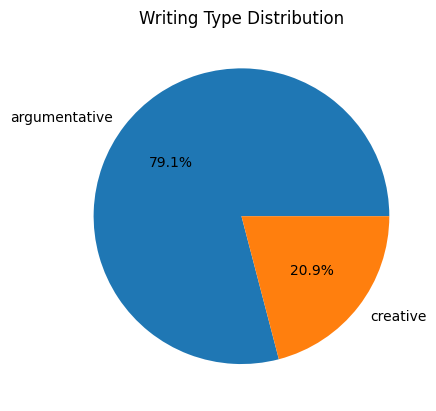

In [67]:
# Creating a subset of the filtered table with only the 'writing_type' and 'Cluster' columns
subset_table = table_filtered[['writing_type', 'Cluster']]

# Counting the number of occurrences of each writing type in the subset table
counts = subset_table['writing_type'].value_counts()

# Creating a pie chart of the writing type counts
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Writing Type Distribution')
writing_type = plt.show()
writing_type

In [68]:
# Filtering the rows with specified clusters, here "Balanced Collaborators" and "Independent Creators"
clusters_to_keep = ['2','0,2','2,0']
table_filtered = table[table['Cluster'].isin(clusters_to_keep)]

print(table_filtered)

          worker_id writing_type    prompt_code Cluster
4    A118BQHK3S4UDV     creative            dad       2
5    A118BQHK3S4UDV     creative          obama       2
6    A118BQHK3S4UDV     creative     sideeffect       2
29   A143XRCI1YXAFE     creative            bee       2
30   A143XRCI1YXAFE     creative            dad       2
..              ...          ...            ...     ...
530   AUAAHI7AUJ419     creative            pig     0,2
531   AUAAHI7AUJ419     creative     sideeffect     0,2
532   AZLZA0Q87TJZO     creative           mana     2,0
533   AZLZA0Q87TJZO     creative  reincarnation     2,0
534   AZLZA0Q87TJZO     creative   shapeshifter     2,0

[255 rows x 4 columns]


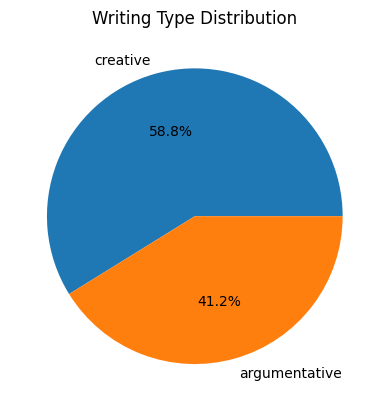

In [69]:
# Creating a subset of the filtered table with only the 'writing_type' and 'Cluster' columns
subset_table = table_filtered[['writing_type', 'Cluster']]

# Counting the number of occurrences of each writing type in the subset table
counts = subset_table['writing_type'].value_counts()

# Creating a pie chart of the writing type counts
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Writing Type Distribution')
writing_type1 = plt.show()
writing_type1

Now, after looking at the 'Creative' and 'Argumentative' writings distribution, we can know that sometimes writers tends to belong to a particular cluster for a particular writing type.

In [136]:
# Getting the worker ids for each writing type
creative_workers = set(expanded_data[expanded_data['writing_type'] == 'creative']['worker_id'])
argumentative_workers = set(expanded_data[expanded_data['writing_type'] == 'argumentative']['worker_id'])

# Define the unwanted sequences
unwanted_sequences = ["0,1,2", "0,2,1", "1,0,2", "1,2,0", "2,1,0", "2,0,1", "2,1"]

# Finding the intersection of the two sets
both_types_workers = creative_workers | argumentative_workers
# Convert the list of worker ids to a DataFrame
both_types_workers_df = expanded_data[expanded_data['worker_id'].isin(both_types_workers)]

# Filter the DataFrame to exclude rows with an unwanted Cluster sequence
filtered_data = both_types_workers_df[~both_types_workers_df['Cluster'].isin(unwanted_sequences)]

# Filtering the DataFrame to include only those rows with a worker id in both_types_workers
#filtered_data = expanded_data[expanded_data['worker_id'].isin(both_types_workers)]
# Replace sequences in 'Cluster' column
filtered_data['Cluster'] = filtered_data['Cluster'].replace({"1,0": "0,1", "2,0": "0,2"})

# Reset the index of the DataFrame
filtered_data = filtered_data.reset_index(drop=True)


In [126]:
filtered_data.to_csv('filtered_data.csv', index=False)

In [192]:
fig = px.scatter(filtered_data, x='worker_id', y='prompt_code', color='Cluster', 
                 hover_data=['Cluster'], 
                 title="Worker Clusters by Writing Type and Prompt Code",height=650, width=1200)

# Adding custom legend for writer profiles
legend_entries = {
    'Balanced Collaborators(Cluster 0)': 'rgba(255,255,255,1)',
    'GPT-3 Reliant Writers(Cluster 1)': 'rgba(255,255,255,1)',
    'Independent Creators(Cluster 2)': 'rgba(255,255,255,1)'
}

y_pos = 1.17
for profile, color in legend_entries.items():
    fig.add_annotation(
        go.layout.Annotation(
            text=profile,
            font=dict(size=11),
            xref="paper",
            yref="paper",
            x=1.07,
            y=y_pos,
            showarrow=False,
            bgcolor=color,
            bordercolor="black",
            borderwidth=0.7
        )
    )
    y_pos -= 0.05

fig.update_xaxes(matches='x')
fig.update_yaxes(matches='y')

# Adjusting plot margins
fig.update_layout(margin=dict(l=50, r=50, t=100, b=50))
mid_y = 9.5

fig.add_shape(
    # Line Horizontal
    dict(
        type="line",
        xref="paper",
        y0=mid_y,
        x0=0,
        x1=1,
        y1=mid_y,
        line=dict(
            color="Grey",
            width=1
        )
))
worker_cluster_viz = fig.show()
worker_cluster_viz

Now, we can know if a particular writer tends to belong to a particular cluster for a particular writing type, i.e, 'argumentative' or 'creative' and can also know if a particular writer tends to belong to a particular cluster for a particular common 'prompt_code'.

In [1]:
# Calculate the number of each 'writing_type' for each 'worker_id' within each 'Cluster'
grouped_data = filtered_data.groupby(['worker_id', 'writing_type', 'Cluster']).size().reset_index(name='count')

# Define the order of the clusters
cluster_order = ['2', '0,2', '0', '0,1', '1']

# Convert 'Cluster' column to a category type with specified order
grouped_data['Cluster'] = pd.Categorical(grouped_data['Cluster'], categories=cluster_order, ordered=True)

# Define the color map
color_map = {'creative': 'red', 'argumentative': 'blue'}  # Replace 'blue' and 'red' with your desired colors

# Recreate the plot with the ordered 'Cluster' column
fig = px.bar(grouped_data, x='worker_id', y='count', color='writing_type', facet_row='Cluster', 
             title="Cluster Switching Behavior per Writing Type", 
             labels={'worker_id': 'Worker ID', 'count': 'Count', 'writing_type': 'Writing Type', 'Cluster': 'Cluster'},
             height=800, width=950,
             category_orders={"Cluster": cluster_order},
             color_discrete_map=color_map)

# Adding custom legend for writer profiles
legend_entries = {
    'Balanced Collaborators(Cluster 0)': 'rgba(255,255,255,1)',
    'GPT-3 Reliant Writers(Cluster 1)': 'rgba(255,255,255,1)',
    'Independent Creators(Cluster 2)': 'rgba(255,255,255,1)'
}

y_pos = 1.13
for profile, color in legend_entries.items():
    fig.add_annotation(
        go.layout.Annotation(
            text=profile,
            font=dict(size=11),
            xref="paper",
            yref="paper",
            x=1.2,
            y=y_pos,
            showarrow=False,
            bgcolor=color,
            bordercolor="black",
            borderwidth=0.7
        )
    )
    y_pos -= 0.035

# Show the plot
worker_cluster_viz1 = fig.show()
worker_cluster_viz1

NameError: name 'filtered_data' is not defined

In [89]:
table['Cluster'] = table['Cluster'].replace({"1,0": "0,1", "2,0": "0,2", "2,1,0": "0,1,2", "1,2,0": "0,1,2", "1,0,2":"0,1,2", "0,2,1":"0,1,2", "2,0,1":"0,1,2"})

In [120]:
# Create a new DataFrame where each row corresponds to a worker-session
worker_sessions = table.groupby(['worker_id', 'writing_type', 'Cluster']).size().reset_index(name='count')

# Map writing_type to numeric values for plotting
worker_sessions['writing_type_numeric'] = worker_sessions['writing_type'].map({'creative': 0, 'argumentative': 1})

# Count the number of occurrences for each combination of 'writing_type' and 'Cluster'
counts = worker_sessions.groupby(['writing_type', 'Cluster']).size().reset_index(name='counts')

# Map clusters and writing_type to unique numeric identifiers for plotting
unique_writing_types = counts['writing_type'].unique()

# Create a custom order for clusters
cluster_order = ["2", "0,2", "0", "0,1", "1", "2,1", "0,1,2"]  # Add or remove as needed
cluster_map = {cluster: i for i, cluster in enumerate(cluster_order)}
writing_type_map = {writing_type: i for i, writing_type in enumerate(unique_writing_types)}

counts['Cluster_numeric'] = counts['Cluster'].map(cluster_map)
counts['writing_type_numeric'] = counts['writing_type'].map(writing_type_map)

# Create scatter plot
fig = px.scatter(counts, 
                 x='Cluster_numeric', 
                 y='writing_type_numeric', 
                 color='Cluster',
                 size='counts', 
                 hover_data=['writing_type', 'Cluster'], 
                 title="Cluster Switching Behavior per Writing Type")

# Customize the layout
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    xaxis=dict(
        tickmode='array',
        tickvals=list(cluster_map.values()),
        ticktext=list(cluster_map.keys())
    ),
    yaxis=dict(
        tickmode='array',
        tickvals=list(writing_type_map.values()),
        ticktext=list(writing_type_map.keys())
    )
)

worker_cluster_viz2 = fig.show()
worker_cluster_viz2


In [188]:
#Visualizing the above obtained dataset to gather insights
fig = px.scatter(filtered_data, x='worker_id', y='prompt_code', color='Cluster', symbol='Cluster', facet_col='writing_type', hover_data=['Cluster'], title="Worker Clusters by Writing Type and Prompt Code")
# Adding custom legend for writer profiles
legend_entries = {
    'Balanced Collaborators(Cluster 0)': 'rgba(156,162,250,1)',
    'GPT-3 Reliant Writers(Cluster 1)': 'rgba(203,156,250,1)',
    'Independent Creators(Cluster 2)': 'rgba(240,112,87,1)'
}
y_pos = 1.38
for profile, color in legend_entries.items():
    fig.add_annotation(
        go.layout.Annotation(
            text=profile,
            font=dict(size=11),
            xref="paper",
            yref="paper",
            x=1.08,
            y=y_pos,
            showarrow=False,
            bgcolor=color,
            bordercolor="black",
            borderwidth=0.7
        )
    )
    y_pos -= 0.1
fig.update_xaxes(matches='x')
fig.update_yaxes(matches='y')
# Adjusting plot margins
fig.update_layout(margin=dict(l=50, r=50, t=100, b=50))
worker_cluster_viz1 = fig.show()
worker_cluster_viz1

Writers like A143XRCI1YXAFE and A1VZSFHTU51JP0 (worker_id) consistently belong to the Independent Creators (Cluster 2) for the creative writing type when given prompts from the 'fantasy' or 'imaginative' like prompt_codes, which include themes like 'shapeshifter', 'reincarnation', 'bee', 'mana', 'fae', and 'pig'. This suggests that these writers excel at generating original content in various creative genres without relying heavily on GPT-3.

Writers like A345TDMHP3DQ3G (worker_id) consistently belong to the GPT-3 Reliant Writers (Cluster 1) for argumentative writing type when given prompts from the 'factual' or 'pragmatic' like prompt_codes, which include themes like athletes, 'dating', 'news', 'school', and 'stereotype'. This may indicate that these writers find GPT-3 particularly useful when working on argumentative pieces.

Writers like A1E235KE3CSO7H, A1VZSFHTU51JP0, and A324VBRLXHG5IB (worker_id) consistently belong to the Balanced Collaborators (Cluster 0) for the argumentative writing type. They also belong to the Independent Creators (Cluster 2) for the creative writing type. This indicates that these writers have a balanced approach to collaboration and independence when working on argumentative pieces, while they are more independent when it comes to creative writing.

Writers like A1198W1SPF1R4, A1QUQ0TV9KVD4C, and A2WGW5Y3ZFBDEC (worker_id) show a preference for both the Balanced Collaborators (Cluster 0) and GPT-3 Reliant Writers (Cluster 1) clusters for the argumentative writing type (59), compared to the creative writing type (18).

Writers like A2ONILC0LZKG6Y, A3P9TM5PRYBH90, and ANCIB6B6EBBIJ (worker_id) consistently belong to the Balanced Collaborators (Cluster 0) for the argumentative writing type and not at all for the creative writing type. This may indicate that these writers are particularly adept at handling argumentative topics that require balanced collaboration with GPT-3.

Writers like A1QUQ0TV9KVD4C, A23KAJRDVCVGOE, and ANCIB6B6EBBIJ consistently belong to all the clusters that are Independent Creators (Cluster 2), Balanced Collaborators (Cluster 0), and GPT-3 Reliant Writers (Cluster 1) only for the creative writing type. There is not a single writer who belongs to all clusters and has written any argumentative writing.

Overall, from all the insights, we can say that for argumentative writings having realistic themes, writers tend to be GPT-3 reliant or collaborate with GPT-3; for creative writings having imaginative or fantasy world-related themes, writers tend to be independent creators, as they can make up any imagination from themselves and doesn't really need to be factual.

In [223]:
# Creating a bar plot for the 'writing_type' column
writing_type_count = cluster_new.groupby(['Cluster', 'writing_type']).size().reset_index(name='count')
fig = px.bar(writing_type_count, x='Cluster', y='count', color='writing_type', title="Writing Type Distribution Across Clusters")

# Adding custom legend for writer profiles
legend_entries = {
    'Balanced Collaborators(Cluster 0)': 'rgba(173,216,230,1)',
    'GPT-3 Reliant Writers(Cluster 1)': 'rgba(255,213,128,1)',
    'Independent Creators(Cluster 2)': 'rgba(144,238,144,1)'
}

y_pos = 1.21
for profile, color in legend_entries.items():
    fig.add_annotation(
        go.layout.Annotation(
            text=profile,
            font=dict(size=12),
            xref="paper",
            yref="paper",
            x=1.15,
            y=y_pos,
            showarrow=False,
            bgcolor=color,
            bordercolor="black",
            borderwidth=0.7
        )
    )
    y_pos -= 0.06

In [224]:
writing_type_dist = fig.show()

Based on the above plot, we can make the following observations:

Balanced Collaborators:

* They have a higher number of argumentative writings (390) compared to creative writings (211).
* This suggests that Balanced Collaborators tend to write more argumentative pieces, although they also engage in creative writing.
* These writers might be skilled at presenting logical arguments and structured thoughts while also appreciating GPT-3's suggestions to refine their writing.

GPT-3 Reliant Writers:

* They don't have a big difference in amount when it comes to creative writings (175) and argumentative writings (95) in comparison with the difference in other clusters.
* This indicates that GPT-3 Reliant Writers are inclined towards creative as well as argumentative writing.
* These writers might rely on GPT-3 to generate ideas, content, or style in their creative writing, which could explain their almost equal usage of GPT-3 suggestions.

Independent Creators:

* They have a significantly higher number of creative writings (444) compared to argumentative writings (129).
* This suggests that Independent Creators have a strong preference for creative writing over argumentative writing.
* These writers might be confident in their creative abilities and prefer to write with minimal reliance on GPT-3's input, focusing on their own imagination and creativity.

In summary, Balanced Collaborators lean more towards argumentative writing, GPT-3 Reliant Writers use it for both argumentative and creative writing, and Independent Creators have a strong inclination towards creative writing with minimal GPT-3 usage.

In [ ]:
end_time = datetime.datetime.now()
total_time = end_time - start_time
total_time

In [ ]:
total_seconds = total_time.total_seconds()
minutes = total_seconds / 60

print(minutes)